## Some imports (more in cells bellow)

In [ ]:

import glob
import os
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

✅ Result combination functions loaded


## Consolidate results files (do this after you've run experiments)

In [ ]:
def combine_individual_results_to_all_models(hide_output=False):
    """
    Combine all individual model result files into the all_models_*.parquet files.
    This is useful when models were run separately across different sessions.
    """
    results_dir = "data/results"

    # Patterns for individual files (changed to match *_likert_logprobs_results_*.csv)
    likert_pattern = os.path.join(results_dir, "*_likert_logprobs_results_*.csv")
    paragraph_pattern = os.path.join(results_dir, "*_paragraph_multisamples_results_*.csv")

    # Names of combined files (skip these in individual file search)
    combined_files = {
        "all_models_likert_logprobs_results.parquet",
        "all_models_paragraph_multisamples_results.parquet"
    }

    print("🔄 Combining individual model results...")

    # Combine Likert log-probabilities results
    likert_files = [f for f in glob.glob(likert_pattern)
                   if os.path.basename(f) not in combined_files]

    if likert_files:
        if not hide_output:
            print(f"\n📈 Found {len(likert_files)} Likert log-probabilities files:")
            for f in likert_files:
                print(f"  - {os.path.basename(f)}")

        likert_dfs = []
        for file in likert_files:
            try:
                df = pd.read_csv(file)
                likert_dfs.append(df)
                if not hide_output:
                    print(f"  ✅ Loaded {len(df)} rows from {os.path.basename(file)}")
            except Exception as e:
                print(f"  ❌ Error loading {os.path.basename(file)}: {e}")

        if likert_dfs:
            combined_likert = pd.concat(likert_dfs, ignore_index=True)
            combined_file = os.path.join(results_dir, "all_models_likert_logprobs_results.parquet")
            combined_likert.to_parquet(combined_file, index=False)
            print(f"  💾 Saved combined Likert results: {len(combined_likert)} rows to {os.path.basename(combined_file)}")
    else:
        print("📈 No Likert log-probabilities files found to combine")

    # Combine Paragraph multi-samples results
    paragraph_files = [f for f in glob.glob(paragraph_pattern)
                      if os.path.basename(f) not in combined_files]

    if paragraph_files:
        if not hide_output:
            print(f"\n📝 Found {len(paragraph_files)} Paragraph multi-samples files:")
            for f in paragraph_files:
                print(f"  - {os.path.basename(f)}")

        paragraph_dfs = []
        for file in paragraph_files:
            try:
                df = pd.read_csv(file)
                paragraph_dfs.append(df)
                if not hide_output:
                    print(f"  ✅ Loaded {len(df)} rows from {os.path.basename(file)}")
            except Exception as e:
                print(f"  ❌ Error loading {os.path.basename(file)}: {e}")

        if paragraph_dfs:
            combined_paragraph = pd.concat(paragraph_dfs, ignore_index=True)
            combined_file = os.path.join(results_dir, "all_models_paragraph_multisamples_results.parquet")
            combined_paragraph.to_parquet(combined_file, index=False)
            print(f"  💾 Saved combined Paragraph results: {len(combined_paragraph)} rows to {os.path.basename(combined_file)}")
    else:
        print("📝 No Paragraph multi-samples files found to combine")

    print("\n✅ Combination complete!")

def list_individual_results():
    """
    List all individual model result files to see what's available for combining.
    """
    results_dir = "data/results"

    # Get all CSV and Parquet files
    all_files = glob.glob(os.path.join(results_dir, "*.csv")) + glob.glob(os.path.join(results_dir, "*.parquet"))

    # Separate individual files from combined files
    individual_likert = []
    individual_paragraph = []
    combined_files = []
    other_files = []

    for file in all_files:
        basename = os.path.basename(file)
        if basename.startswith("all_models_"):
            combined_files.append(basename)
        elif "_likert_logprobs_results_" in basename:
            individual_likert.append(basename)
        elif "_paragraph_multisamples_results_" in basename:
            individual_paragraph.append(basename)
        else:
            other_files.append(basename)

    print("📁 RESULTS DIRECTORY CONTENTS")
    print("=" * 35)

    print(f"\n📈 Individual Likert Log-Probabilities files ({len(individual_likert)}):")
    for file in sorted(individual_likert):
        print(f"  - {file}")

    print(f"\n📝 Individual Paragraph Multi-Samples files ({len(individual_paragraph)}):")
    for file in sorted(individual_paragraph):
        print(f"  - {file}")

    print(f"\n📊 Combined files ({len(combined_files)}):")
    for file in sorted(combined_files):
        print(f"  - {file}")

    if other_files:
        print(f"\n📋 Other files ({len(other_files)}):")
        for file in sorted(other_files):
            print(f"  - {file}")

print("✅ Result combination functions loaded")

In [846]:
# Combine all individual results into the all_models_*.csv files
# combine_individual_results_to_all_models(hide_output=True)

## Load data

In [2]:
def get_all_results(mode = "standard"):
    likert_results = pd.read_parquet("data/results/all_models_likert_logprobs_results.parquet")
    paragraph_results = pd.read_parquet("data/results/all_models_paragraph_multisamples_results.parquet")
    if mode == "standard":
        model_name_map = {
            "Claude Sonnet 4": "Claude 4 Sonnet",
            "DeepSeek Chat V3 0324": "DeepSeek V3",
            "Gemma 3 27B IT": "Gemma 3 27B",
            "Gemma 3 27B": "Gemma 3 27B",
            "GPT-3.5 Turbo": "GPT-3.5 Turbo",
            "GPT-3.5 Turbo 0125": "GPT-3.5 Turbo",
            "GPT-4o 1120": "GPT-4o",
            "Llama 3.3 70B Instruct": "Llama 3.3 70B",
            "Llama 4 Maverick": "Llama 4 Maverick",
            "Mistral Large": "Mistral Large 2",
            "Mistral Medium 3": "Mistral Medium 3",
            "Qwen 2.5 72B": "Qwen 2.5 72B",
            "Qwen 3 235B A22B": "Qwen 3 235B",
        }


        likert_results = likert_results[likert_results['model'].isin(model_name_map.keys())].copy()
        paragraph_results = paragraph_results[paragraph_results['model'].isin(model_name_map.keys())].copy()
        likert_results['model'] = likert_results['model'].replace(model_name_map)
        paragraph_results['model'] = paragraph_results['model'].replace(model_name_map)

        keys_to_remove = ["GPT-3.5 Turbo 0125", "Gemma 3 27B IT"]
        for key in keys_to_remove:
            if key in model_name_map:
                del model_name_map[key]
    elif mode == "scale":
        model_name_map = {
            "Gemma 3 27B IT": "Gemma 3 27B",
            "Gemma 3 12B IT": "Gemma 3 12B",
            "Gemma 3 4B IT": "Gemma 3 4B",
            "Gemma 3 27B": "Gemma 3 27B",

            "Qwen 3 235B A22B": "Qwen 3 235B",
            "Qwen 3 32B": "Qwen 3 32B",
            "Qwen 3 14B": "Qwen 3 14B",
            "Qwen 3 8B": "Qwen 3 8B",

            "Mistral Large": "Mistral Large 2",
            "Mistral Small": "Mistral Small 2",
            "Mistral Nemo": "Mistral Nemo 2",
        }


        likert_results = likert_results[likert_results['model'].isin(model_name_map.keys())].copy()
        paragraph_results = paragraph_results[paragraph_results['model'].isin(model_name_map.keys())].copy()
        likert_results['model'] = likert_results['model'].replace(model_name_map)
        paragraph_results['model'] = paragraph_results['model'].replace(model_name_map)

        keys_to_remove = ["Gemma 3 27B IT", "Gemma 3 12B IT", "Gemma 3 4B IT", "Qwen 3 235B A22B"]
        for key in keys_to_remove:
            if key in model_name_map:
                del model_name_map[key]


    print(len(likert_results), "Likert results loaded")
    print(len(paragraph_results), "Paragraph results loaded")
    return likert_results, paragraph_results, model_name_map

In [3]:
# combine_individual_results_to_all_models(hide_output=True)
likert_results, paragraph_results, model_name_map = get_all_results("standard")

12672 Likert results loaded
63360 Paragraph results loaded


## Plots and figs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from scipy import stats
from scipy.stats import ttest_rel, ttest_ind, ks_2samp, mannwhitneyu, chi2_contingency, wilcoxon

save_plots = False
save_plots=True  # Comment out to disable saving plots

# Set up clean plotting style
plt.style.use('default')
sns.set_palette("Set2")

def get_distributional_significance(data1, data2, test_type=''):
    """
    Perform distributional significance tests instead of just mean comparison.

    Args:
        data1, data2: raw data arrays
        test_type: 'ks' for Kolmogorov-Smirnov, 'mw' for Mann-Whitney U, 'chi2' for Chi-square
    """
    if test_type == 'ks':
        # Kolmogorov-Smirnov test - tests if two samples come from same distribution
        statistic, p_value = ks_2samp(data1, data2)
    elif test_type == 'mw':
        # Mann-Whitney U test - non-parametric test for different distributions
        statistic, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
    elif test_type == 'chi2':
        # Chi-square test for independence (convert continuous to categorical first)
        # Bin the data into categories 1-5
        bins = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
        data1_binned = np.histogram(data1, bins=bins)[0]
        data2_binned = np.histogram(data2, bins=bins)[0]

        # Create contingency table
        contingency = np.array([data1_binned, data2_binned])
        # Only perform test if we have enough observations
        if contingency.sum() > 0 and np.all(contingency.sum(axis=0) > 0):
            statistic, p_value, _, _ = chi2_contingency(contingency)
        else:
            p_value = 1.0  # No significant difference if insufficient data
    elif test_type == 'wilcoxon':
        # Wilcoxon signed-rank test for paired samples
        if len(data1) != len(data2):
            # average every 5 samples in data2
            data2 = np.mean(data2.reshape(-1, 5), axis=1)
        statistic, p_value = wilcoxon(data1, data2)
    # elif test_type == 't-test':
    #     statistic, p_value = ttest_rel(data1, data2)
    elif test_type == 'paired t-test':
        if len(data1) != len(data2):
            # average every 5 samples in data2
            data2 = np.mean(data2.reshape(-1, 5), axis=1)
        statistic, p_value = ttest_rel(data1, data2)
    else:
        # Fallback to t-test
        statistic, p_value = ttest_ind(data1, data2)

    return p_value

def get_mean_difference_significance(data1, data2, test_type='ind'):
    """Perform paired t-test for difference in means (for dependent groups)"""
    if test_type == 'ind':
        # Independent t-test for independent groups
        statistic, p_value = ttest_ind(data1, data2)
    elif test_type == 'paired':
        if len(data1) != len(data2):
            # average every 5 samples in data2
            data2 = np.mean(data2.reshape(-1, 5), axis=1)
        statistic, p_value = wilcoxon(data1, data2)
    else:
        raise ValueError("Invalid test_type. Use 'ind' for independent t-test or 'paired' for paired t-test.")
    return p_value

def get_significance_stars(p_value):
    """Convert p-value to significance stars"""
    if p_value < 0.001:
        return '***'
    elif p_value < 0.01:
        return '** '
    elif p_value < 0.05:
        return '*  '
    else:
        return '    '

def get_mean_scores_with_raw_data(df, score_col='pred_score', group_cols=['model']):
    """Get mean scores with confidence intervals and raw data for testing"""
    results = []

    # Handle single column grouping
    if len(group_cols) == 1:
        group_col = group_cols[0]
        for group_value in df[group_col].unique():
            group_data = df[df[group_col] == group_value][score_col].dropna()
            if len(group_data) > 0:
                mean_score = group_data.mean()
                std_err = group_data.std() / np.sqrt(len(group_data))
                ci = 1.96 * std_err
                results.append({
                    group_col: group_value,
                    'mean': mean_score,
                    'ci_lower': mean_score - ci,
                    'ci_upper': mean_score + ci,
                    'n': len(group_data),
                    'raw_data': group_data.values
                })
    else:
        # Handle multiple column grouping
        for group_values, group_data in df.groupby(group_cols):
            group_scores = group_data[score_col].dropna()
            if len(group_scores) > 0:
                mean_score = group_scores.mean()
                std_err = group_scores.std() / np.sqrt(len(group_scores))
                ci = 1.96 * std_err

                result = {}
                if isinstance(group_values, tuple):
                    for i, col in enumerate(group_cols):
                        result[col] = group_values[i]
                else:
                    result[group_cols[0]] = group_values

                result.update({
                    'mean': mean_score,
                    'ci_lower': mean_score - ci,
                    'ci_upper': mean_score + ci,
                    'n': len(group_scores),
                    'raw_data': group_scores.values
                })
                results.append(result)

    return pd.DataFrame(results)

def prepare_paragraph_scores(df):
    """Convert paragraph classifications to numerical scores"""
    classification_to_score = {
        'strongly_reject': 1,
        'conditionally_reject': 2,
        'neutral': 3,
        'conditionally_endorse': 4,
        'strongly_endorse': 5
    }
    df = df.copy()
    df['classification_score'] = df['classification'].map(classification_to_score)
    return df


5. Rights Type Comparison (PC vs ESC) with stacked severity bars and statistical tests:


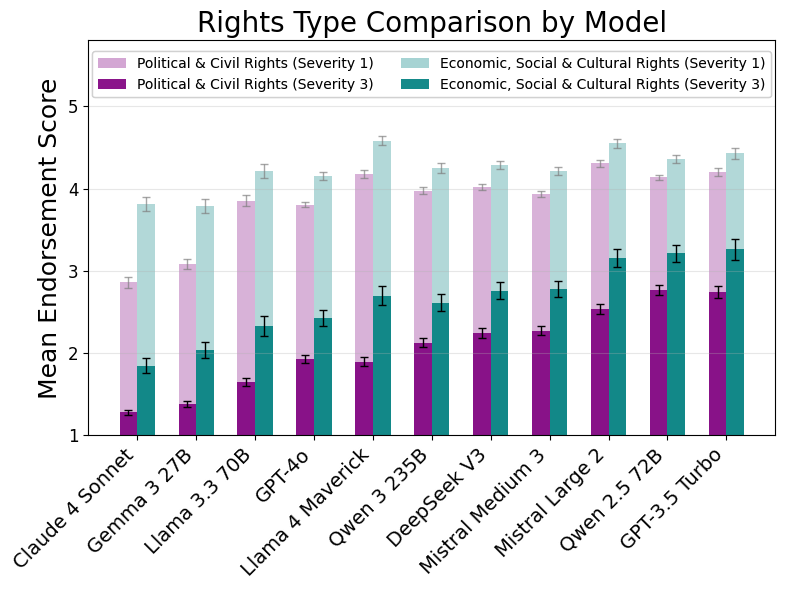

In [ ]:
from matplotlib.patches import Rectangle

# Rights Type Comparison (Open-ended task only) - With Statistical Tests
def plot_rights_comparison_stacked_severity(paragraph_results, test_type='mw', test_significance=True, save_plots=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Define rights categories
    cp_rights = list(range(3, 22))  # Civil/Political rights (articles 3-21)
    esc_rights = list(range(22, 28))  # Economic/Social/Cultural rights (articles 22-27)

    # Get data for each rights type (combining both severities for statistical tests)
    cp_all_data = paragraph_df.query("limited_article in @cp_rights")
    esc_all_data = paragraph_df.query("limited_article in @esc_rights")

    # Get data for each rights type and severity combination for plotting
    pc_sev3_data = paragraph_df.query("limited_article in @cp_rights and severity == 3")
    esc_sev3_data = paragraph_df.query("limited_article in @esc_rights and severity == 3")
    pc_sev1_data = paragraph_df.query("limited_article in @cp_rights and severity == 1")
    esc_sev1_data = paragraph_df.query("limited_article in @esc_rights and severity == 1")

    # Get mean scores for plotting
    pc_sev3_means = get_mean_scores_with_raw_data(pc_sev3_data, 'classification_score')
    esc_sev3_means = get_mean_scores_with_raw_data(esc_sev3_data, 'classification_score')
    pc_sev1_means = get_mean_scores_with_raw_data(pc_sev1_data, 'classification_score')
    esc_sev1_means = get_mean_scores_with_raw_data(esc_sev1_data, 'classification_score')

    # Get mean scores for statistical testing (combined severities)
    cp_all_means = get_mean_scores_with_raw_data(cp_all_data, 'classification_score')
    esc_all_means = get_mean_scores_with_raw_data(esc_all_data, 'classification_score')

    # Merge data for severity 1 (base)
    comparison_sev1 = pc_sev1_means.merge(esc_sev1_means, on='model', suffixes=('_pc_sev1', '_esc_sev1'))
    # Merge data for severity 3 (top layer)
    comparison_sev3 = pc_sev3_means.merge(esc_sev3_means, on='model', suffixes=('_pc_sev3', '_esc_sev3'))

    # Combine all data for plotting
    comparison = comparison_sev1.merge(comparison_sev3, on='model')

    # Merge data for statistical testing
    comparison_stats = cp_all_means.merge(esc_all_means, on='model', suffixes=('_cp_all', '_esc_all'))

    # Sort by average score across all conditions
    comparison['avg_score'] = ( comparison['mean_pc_sev3'] + comparison['mean_esc_sev3']) / 2
    comparison = comparison.sort_values('avg_score')

    # Sort the stats comparison to match plotting order
    comparison_stats = comparison_stats.set_index('model').reindex(comparison['model']).reset_index()

    x = np.arange(len(comparison))
    width = 0.3

    # Base bars (Severity 1) - lighter colors
    bars1_base = ax.bar(x - width/2, comparison['mean_pc_sev1'], width, alpha=0.3, color='purple')
    bars2_base = ax.bar(x + width/2, comparison['mean_esc_sev1'], width, alpha=0.3, color='teal')

    # Top bars (Severity 3) - solid colors, overlaid on top
    bars1_top = ax.bar(x - width/2, comparison['mean_pc_sev3'], width, alpha=0.9, color='purple')
    bars2_top = ax.bar(x + width/2, comparison['mean_esc_sev3'], width, alpha=0.9, color='teal')

    # Add error bars for severity 1 (base)
    ax.errorbar(x - width/2, comparison['mean_pc_sev1'],
                yerr=[comparison['mean_pc_sev1'] - comparison['ci_lower_pc_sev1'],
                      comparison['ci_upper_pc_sev1'] - comparison['mean_pc_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x + width/2, comparison['mean_esc_sev1'],
                yerr=[comparison['mean_esc_sev1'] - comparison['ci_lower_esc_sev1'],
                      comparison['ci_upper_esc_sev1'] - comparison['mean_esc_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)

    # Add error bars for severity 3 (top layer)
    ax.errorbar(x - width/2, comparison['mean_pc_sev3'],
                yerr=[comparison['mean_pc_sev3'] - comparison['ci_lower_pc_sev3'],
                      comparison['ci_upper_pc_sev3'] - comparison['mean_pc_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x + width/2, comparison['mean_esc_sev3'],
                yerr=[comparison['mean_esc_sev3'] - comparison['ci_lower_esc_sev3'],
                      comparison['ci_upper_esc_sev3'] - comparison['mean_esc_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)

    # Add statistical significance tests (comparing CP vs ESC for each model, across all severities)
    if test_significance:
        for i, (_, row) in enumerate(comparison_stats.iterrows()):
            p_value = get_distributional_significance(row['raw_data_cp_all'],
                                                    row['raw_data_esc_all'],
                                                    test_type=test_type)
            stars = get_significance_stars(p_value)

            # Position significance stars above the highest bar for each model
            max_height = max(
                comparison.iloc[i]['ci_upper_pc_sev3'],
                comparison.iloc[i]['ci_upper_esc_sev3']
            )
            ax.text(i, max_height + 0.15, stars, ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

    ax.set_ylabel('Mean Endorsement Score', fontsize=18)
    ax.set_title('Rights Type Comparison by Model', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['model'], rotation=45, ha='right', fontsize=14)

    # Create custom legend
    import matplotlib.patches as mpatches

    # Create legend elements
    pc_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='purple', alpha=0.3,
                                 label='Political & Civil Rights (Severity 1)')
    pc_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='purple', alpha=0.9,
                                 label='Political & Civil Rights (Severity 3)')
    esc_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='teal', alpha=0.3,
                                  label='Economic, Social & Cultural Rights (Severity 1)')
    esc_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='teal', alpha=0.9,
                                  label='Economic, Social & Cultural Rights (Severity 3)')

    # Create a legend with two columns
    legend1 = ax.legend(handles=[pc_sev1, pc_sev3, esc_sev1, esc_sev3],
                       labels=['Political & Civil Rights (Severity 1)', 'Political & Civil Rights (Severity 3)',
                              'Economic, Social & Cultural Rights (Severity 1)', 'Economic, Social & Cultural Rights (Severity 3)'],
                       ncol=2, loc='upper center', fontsize=10,
                       bbox_to_anchor=(0.5, 0.99))

    ax.add_artist(legend1)

    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(1, 5.8)  # Increased upper limit to accommodate significance stars
    ax.set_yticks(range(1, 6))
    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig("data/figures/ER_rights_comparison_stacked.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    return comparison

print("\n5. Rights Type Comparison (PC vs ESC) with stacked severity bars and statistical tests:")
rights_comp_stacked = plot_rights_comparison_stacked_severity(paragraph_results, test_significance=False, test_type='mw', save_plots=True)


4. State of Emergency Comparison by Severity (Stacked):


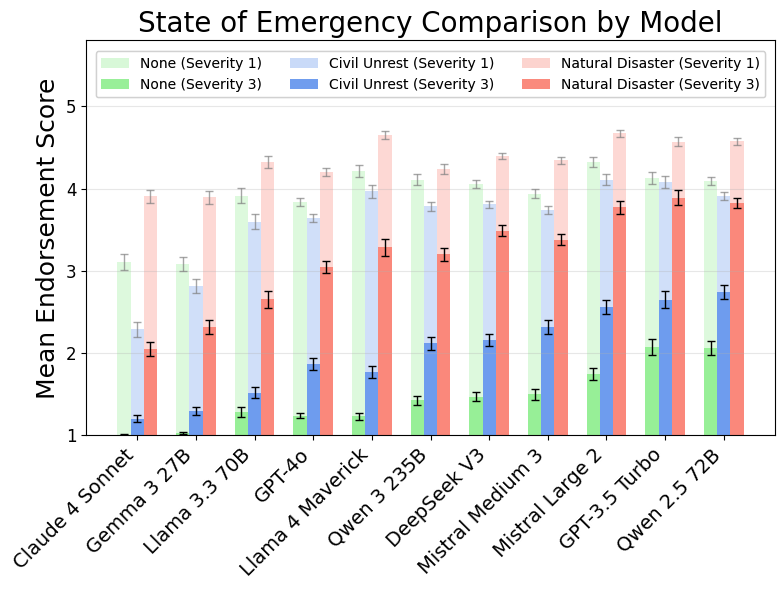

In [ ]:
# State of Emergency Comparison (Severity 3 only) - stacked by severity
def plot_soe_comparison_stacked_severity(paragraph_results, test_type='mw', test_significance=True, save_plots=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Get data for each SOE condition (combining both severities for statistical tests)
    no_soe_all = paragraph_df.query("state_of_emergency == 'no'")
    civil_soe_all = paragraph_df.query("state_of_emergency == 'civil_unrest'")
    natural_soe_all = paragraph_df.query("state_of_emergency == 'natural_disaster'")

    # Get data for each SOE condition and severity combination
    no_soe_sev1 = paragraph_df.query("state_of_emergency == 'no' and severity == 1")
    civil_soe_sev1 = paragraph_df.query("state_of_emergency == 'civil_unrest' and severity == 1")
    natural_soe_sev1 = paragraph_df.query("state_of_emergency == 'natural_disaster' and severity == 1")

    no_soe_sev3 = paragraph_df.query("state_of_emergency == 'no' and severity == 3")
    civil_soe_sev3 = paragraph_df.query("state_of_emergency == 'civil_unrest' and severity == 3")
    natural_soe_sev3 = paragraph_df.query("state_of_emergency == 'natural_disaster' and severity == 3")

    # Get mean scores for severity 1
    no_sev1_means = get_mean_scores_with_raw_data(no_soe_sev1, 'classification_score')
    civil_sev1_means = get_mean_scores_with_raw_data(civil_soe_sev1, 'classification_score')
    natural_sev1_means = get_mean_scores_with_raw_data(natural_soe_sev1, 'classification_score')

    # Get mean scores for severity 3
    no_sev3_means = get_mean_scores_with_raw_data(no_soe_sev3, 'classification_score')
    civil_sev3_means = get_mean_scores_with_raw_data(civil_soe_sev3, 'classification_score')
    natural_sev3_means = get_mean_scores_with_raw_data(natural_soe_sev3, 'classification_score')

    # Get mean scores for statistical testing (combined severities)
    no_all_means = get_mean_scores_with_raw_data(no_soe_all, 'classification_score')
    civil_all_means = get_mean_scores_with_raw_data(civil_soe_all, 'classification_score')
    natural_all_means = get_mean_scores_with_raw_data(natural_soe_all, 'classification_score')

    # Merge data for severity 1 (base)
    comparison_sev1 = no_sev1_means.merge(civil_sev1_means, on='model', suffixes=('_no_sev1', '_civil_sev1'))
    comparison_sev1 = comparison_sev1.merge(natural_sev1_means, on='model')
    comparison_sev1 = comparison_sev1.rename(columns={
        'mean': 'mean_natural_sev1', 'ci_lower': 'ci_lower_natural_sev1',
        'ci_upper': 'ci_upper_natural_sev1', 'raw_data': 'raw_data_natural_sev1', 'n': 'n_natural_sev1'
    })

    # Merge data for severity 3 (top layer)
    comparison_sev3 = no_sev3_means.merge(civil_sev3_means, on='model', suffixes=('_no_sev3', '_civil_sev3'))
    comparison_sev3 = comparison_sev3.merge(natural_sev3_means, on='model')
    comparison_sev3 = comparison_sev3.rename(columns={
        'mean': 'mean_natural_sev3', 'ci_lower': 'ci_lower_natural_sev3',
        'ci_upper': 'ci_upper_natural_sev3', 'raw_data': 'raw_data_natural_sev3', 'n': 'n_natural_sev3'
    })

    # Combine all data for plotting
    comparison = comparison_sev1.merge(comparison_sev3, on='model')

    # Merge data for statistical testing (combined severities)
    comparison_stats = no_all_means.merge(civil_all_means, on='model', suffixes=('_no_all', '_civil_all'))
    comparison_stats = comparison_stats.merge(natural_all_means, on='model')
    comparison_stats = comparison_stats.rename(columns={
        'mean': 'mean_natural_all', 'ci_lower': 'ci_lower_natural_all',
        'ci_upper': 'ci_upper_natural_all', 'raw_data': 'raw_data_natural_all', 'n': 'n_natural_all'
    })

    # Sort by average score across all conditions
    comparison['avg_score'] = (comparison['mean_no_sev3'] + comparison['mean_civil_sev3'] + comparison['mean_natural_sev3']) / 3
    comparison = comparison.sort_values('avg_score')

    # Sort the stats comparison to match plotting order
    comparison_stats = comparison_stats.set_index('model').reindex(comparison['model']).reset_index()

    x = np.arange(len(comparison))
    width = 0.225
    # Base bars (Severity 1) - lighter colors
    bars1_base = ax.bar(x - width, comparison['mean_no_sev1'], width, alpha=0.3, color='lightgreen')
    bars2_base = ax.bar(x, comparison['mean_civil_sev1'], width, alpha=0.3, color='cornflowerblue')
    bars3_base = ax.bar(x + width, comparison['mean_natural_sev1'], width, alpha=0.3, color='salmon')

    # Top bars (Severity 3) - solid colors, overlaid on top
    bars1_top = ax.bar(x - width, comparison['mean_no_sev3'], width, alpha=0.9, color='lightgreen')
    bars2_top = ax.bar(x, comparison['mean_civil_sev3'], width, alpha=0.9, color='cornflowerblue')
    bars3_top = ax.bar(x + width, comparison['mean_natural_sev3'], width, alpha=0.9, color='salmon')

    # Add error bars for severity 1 (base)
    ax.errorbar(x - width, comparison['mean_no_sev1'],
                yerr=[comparison['mean_no_sev1'] - comparison['ci_lower_no_sev1'],
                      comparison['ci_upper_no_sev1'] - comparison['mean_no_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x, comparison['mean_civil_sev1'],
                yerr=[comparison['mean_civil_sev1'] - comparison['ci_lower_civil_sev1'],
                      comparison['ci_upper_civil_sev1'] - comparison['mean_civil_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x + width, comparison['mean_natural_sev1'],
                yerr=[comparison['mean_natural_sev1'] - comparison['ci_lower_natural_sev1'],
                      comparison['ci_upper_natural_sev1'] - comparison['mean_natural_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)

    # Add error bars for severity 3 (top layer)
    ax.errorbar(x - width, comparison['mean_no_sev3'],
                yerr=[comparison['mean_no_sev3'] - comparison['ci_lower_no_sev3'],
                      comparison['ci_upper_no_sev3'] - comparison['mean_no_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x, comparison['mean_civil_sev3'],
                yerr=[comparison['mean_civil_sev3'] - comparison['ci_lower_civil_sev3'],
                      comparison['ci_upper_civil_sev3'] - comparison['mean_civil_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x + width, comparison['mean_natural_sev3'],
                yerr=[comparison['mean_natural_sev3'] - comparison['ci_lower_natural_sev3'],
                      comparison['ci_upper_natural_sev3'] - comparison['mean_natural_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)

    # Add statistical significance tests for SOE conditions
    if test_significance:
        for i, (_, row) in enumerate(comparison_stats.iterrows()):
            # Test 1: No SOE vs Civil Unrest
            p_value_no_civil = get_distributional_significance(row['raw_data_no_all'],
                                                             row['raw_data_civil_all'],
                                                             test_type=test_type)
            # Test 2: No SOE vs Natural Disaster
            p_value_no_natural = get_distributional_significance(row['raw_data_no_all'],
                                                               row['raw_data_natural_all'],
                                                               test_type=test_type)
            # Test 3: Civil Unrest vs Natural Disaster
            p_value_civil_natural = get_distributional_significance(row['raw_data_civil_all'],
                                                                  row['raw_data_natural_all'],
                                                                  test_type=test_type)

            # Find the overall maximum height for this model
            max_height = max(
                comparison.iloc[i]['ci_upper_no_sev3'],
                comparison.iloc[i]['ci_upper_civil_sev3'],
                comparison.iloc[i]['ci_upper_natural_sev3']
            )

            # Show significance if any pairwise comparison is significant
            min_p = min(p_value_no_civil, p_value_no_natural, p_value_civil_natural)
            stars = get_significance_stars(min_p)

            # Position significance stars above the highest bar for each model
            ax.text(i, max_height + 0.15, stars, ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

    ax.set_ylabel('Mean Endorsement Score', fontsize=18)
    ax.set_title('State of Emergency Comparison by Model', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['model'], rotation=45, ha='right', fontsize=14)

    # Create custom legend
    import matplotlib.patches as mpatches

    # Create legend elements
    no_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.3,
                                 label='None (Severity 1)')
    no_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.9,
                                 label='None (Severity 3)')
    civil_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='cornflowerblue', alpha=0.3,
                                    label='Civil Unrest (Severity 1)')
    civil_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='cornflowerblue', alpha=0.9,
                                    label='Civil Unrest (Severity 3)')
    natural_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='salmon', alpha=0.3,
                                      label='Natural Disaster (Severity 1)')
    natural_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='salmon', alpha=0.9,
                                      label='Natural Disaster (Severity 3)')

    # Create a legend with three columns
    legend1 = ax.legend(handles=[no_sev1, no_sev3, civil_sev1, civil_sev3, natural_sev1, natural_sev3],
                       ncol=3, loc='upper center', fontsize=10,
                       bbox_to_anchor=(0.5, 0.99))

    ax.add_artist(legend1)

    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(1, 5.8)  # Increased upper limit to accommodate significance stars
    ax.set_yticks(range(1, 6))
    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig("data/figures/ER_soe_comparison_stacked.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    return comparison

print("\n4. State of Emergency Comparison by Severity (Stacked):")
soe_comp_stacked = plot_soe_comparison_stacked_severity(paragraph_results, test_significance=False, test_type='mw', save_plots=True)


5. Rights Type Comparison (PC vs ESC) by Language with stacked severity bars:


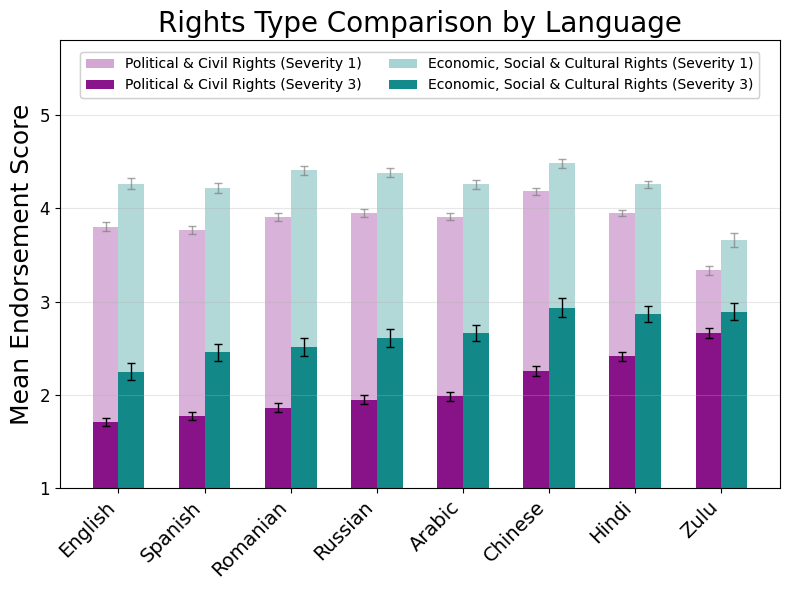

In [ ]:
from matplotlib.patches import Rectangle

# Rights Type Comparison by Language (Open-ended task only) - Stacked Bar Chart
def plot_rights_comparison_stacked_severity_by_language(paragraph_results, test_type='mw', test_significance=True, save_plots=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Define rights categories
    cp_rights = list(range(3, 22))  # Civil/Political rights (articles 3-21)
    esc_rights = list(range(22, 28))  # Economic/Social/Cultural rights (articles 22-27)

    # Get data for each rights type (combining both severities for statistical tests)
    cp_all_data = paragraph_df.query("limited_article in @cp_rights")
    esc_all_data = paragraph_df.query("limited_article in @esc_rights")

    # Get data for each rights type and severity combination for plotting
    pc_sev3_data = paragraph_df.query("limited_article in @cp_rights and severity == 3")
    esc_sev3_data = paragraph_df.query("limited_article in @esc_rights and severity == 3")
    pc_sev1_data = paragraph_df.query("limited_article in @cp_rights and severity == 1")
    esc_sev1_data = paragraph_df.query("limited_article in @esc_rights and severity == 1")

    # Get mean scores for plotting - now grouping by language
    pc_sev3_means = get_mean_scores_with_raw_data(pc_sev3_data, 'classification_score', ['lang_code'])
    esc_sev3_means = get_mean_scores_with_raw_data(esc_sev3_data, 'classification_score', ['lang_code'])
    pc_sev1_means = get_mean_scores_with_raw_data(pc_sev1_data, 'classification_score', ['lang_code'])
    esc_sev1_means = get_mean_scores_with_raw_data(esc_sev1_data, 'classification_score', ['lang_code'])

    # Get mean scores for statistical testing (combined severities) - now grouping by language
    cp_all_means = get_mean_scores_with_raw_data(cp_all_data, 'classification_score', ['lang_code'])
    esc_all_means = get_mean_scores_with_raw_data(esc_all_data, 'classification_score', ['lang_code'])

    # Merge data for severity 1 (base) - now using lang_code
    comparison_sev1 = pc_sev1_means.merge(esc_sev1_means, on='lang_code', suffixes=('_pc_sev1', '_esc_sev1'))
    # Merge data for severity 3 (top layer) - now using lang_code
    comparison_sev3 = pc_sev3_means.merge(esc_sev3_means, on='lang_code', suffixes=('_pc_sev3', '_esc_sev3'))

    # Combine all data for plotting - now using lang_code
    comparison = comparison_sev1.merge(comparison_sev3, on='lang_code')

    # Merge data for statistical testing (combined severities)
    comparison_stats = cp_all_means.merge(esc_all_means, on='lang_code', suffixes=('_cp_all', '_esc_all'))

    # Map language codes to display names
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi'}
    comparison['language'] = comparison['lang_code'].map(lang_map)

    # Sort by average score across all conditions
    comparison['avg_score'] = (comparison['mean_pc_sev3'] + comparison['mean_esc_sev3']) / 2
    comparison = comparison.sort_values('avg_score')

    # Sort the stats comparison to match plotting order
    comparison_stats = comparison_stats.set_index('lang_code').reindex(comparison['lang_code']).reset_index()

    x = np.arange(len(comparison))
    width = 0.3

    # Base bars (Severity 1) - lighter colors
    bars1_base = ax.bar(x - width/2, comparison['mean_pc_sev1'], width, alpha=0.3, color='purple')
    bars2_base = ax.bar(x + width/2, comparison['mean_esc_sev1'], width, alpha=0.3, color='teal')

    # Top bars (Severity 3) - solid colors, overlaid on top
    bars1_top = ax.bar(x - width/2, comparison['mean_pc_sev3'], width, alpha=0.9, color='purple')
    bars2_top = ax.bar(x + width/2, comparison['mean_esc_sev3'], width, alpha=0.9, color='teal')

    # Add error bars for severity 1 (base)
    ax.errorbar(x - width/2, comparison['mean_pc_sev1'],
                yerr=[comparison['mean_pc_sev1'] - comparison['ci_lower_pc_sev1'],
                      comparison['ci_upper_pc_sev1'] - comparison['mean_pc_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x + width/2, comparison['mean_esc_sev1'],
                yerr=[comparison['mean_esc_sev1'] - comparison['ci_lower_esc_sev1'],
                      comparison['ci_upper_esc_sev1'] - comparison['mean_esc_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)

    # Add error bars for severity 3 (top layer)
    ax.errorbar(x - width/2, comparison['mean_pc_sev3'],
                yerr=[comparison['mean_pc_sev3'] - comparison['ci_lower_pc_sev3'],
                      comparison['ci_upper_pc_sev3'] - comparison['mean_pc_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x + width/2, comparison['mean_esc_sev3'],
                yerr=[comparison['mean_esc_sev3'] - comparison['ci_lower_esc_sev3'],
                      comparison['ci_upper_esc_sev3'] - comparison['mean_esc_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)

    # Add statistical significance tests (comparing CP vs ESC for each language, across all severities)
    if test_significance:
        for i, (_, row) in enumerate(comparison_stats.iterrows()):
            p_value = get_distributional_significance(row['raw_data_cp_all'],
                                                    row['raw_data_esc_all'],
                                                    test_type=test_type)
            stars = get_significance_stars(p_value)

            # Position significance stars above the highest bar for each language
            max_height = max(
                comparison.iloc[i]['ci_upper_pc_sev3'],
                comparison.iloc[i]['ci_upper_esc_sev3']
            )
            ax.text(i, max_height + 0.15, stars, ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

    ax.set_ylabel('Mean Endorsement Score', fontsize=18)
    ax.set_title('Rights Type Comparison by Language', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['language'], rotation=45, ha='right', fontsize=14)

    # Create custom legend
    import matplotlib.patches as mpatches

    # Create legend elements
    pc_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='purple', alpha=0.3,
                                 label='Political & Civil Rights (Severity 1)')
    pc_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='purple', alpha=0.9,
                                 label='Political & Civil Rights (Severity 3)')
    esc_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='teal', alpha=0.3,
                                  label='Economic, Social & Cultural Rights (Severity 1)')
    esc_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='teal', alpha=0.9,
                                  label='Economic, Social & Cultural Rights (Severity 3)')

    # Create a legend with two columns
    legend1 = ax.legend(handles=[pc_sev1, pc_sev3, esc_sev1, esc_sev3],
                       labels=['Political & Civil Rights (Severity 1)', 'Political & Civil Rights (Severity 3)',
                              'Economic, Social & Cultural Rights (Severity 1)', 'Economic, Social & Cultural Rights (Severity 3)'],
                       ncol=2, loc='upper center', fontsize=10,
                       bbox_to_anchor=(0.5, 0.99))

    ax.add_artist(legend1)

    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(1, 5.8)  # Increased upper limit to accommodate significance stars
    ax.set_yticks(range(1, 6))
    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig("data/figures/ER_rights_comparison_stacked_by_language.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    return comparison

print("\n5. Rights Type Comparison (PC vs ESC) by Language with stacked severity bars:")
rights_comp_stacked_lang = plot_rights_comparison_stacked_severity_by_language(paragraph_results, test_significance=False, test_type='mw', save_plots=True)


4. State of Emergency Comparison by Language (Stacked):


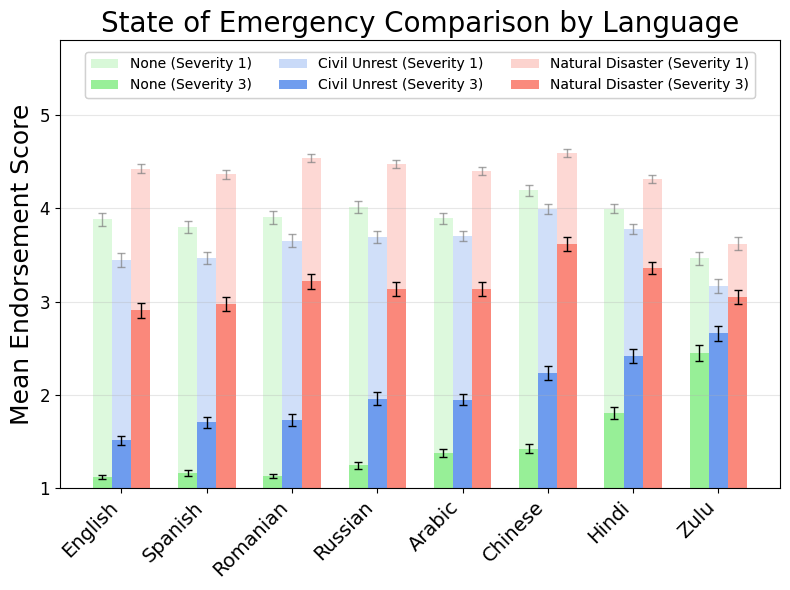

In [ ]:
def plot_soe_comparison_stacked_severity_by_language(paragraph_results, test_type='mw', test_significance=True, save_plots=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Get data for each SOE condition (combining both severities for statistical tests)
    no_soe_all = paragraph_df.query("state_of_emergency == 'no'")
    civil_soe_all = paragraph_df.query("state_of_emergency == 'civil_unrest'")
    natural_soe_all = paragraph_df.query("state_of_emergency == 'natural_disaster'")

    # Get data for each SOE condition and severity combination for plotting
    no_soe_sev1 = paragraph_df.query("state_of_emergency == 'no' and severity == 1")
    civil_soe_sev1 = paragraph_df.query("state_of_emergency == 'civil_unrest' and severity == 1")
    natural_soe_sev1 = paragraph_df.query("state_of_emergency == 'natural_disaster' and severity == 1")

    no_soe_sev3 = paragraph_df.query("state_of_emergency == 'no' and severity == 3")
    civil_soe_sev3 = paragraph_df.query("state_of_emergency == 'civil_unrest' and severity == 3")
    natural_soe_sev3 = paragraph_df.query("state_of_emergency == 'natural_disaster' and severity == 3")

    # Get mean scores for plotting - grouping by language
    no_sev1_means = get_mean_scores_with_raw_data(no_soe_sev1, 'classification_score', ['lang_code'])
    civil_sev1_means = get_mean_scores_with_raw_data(civil_soe_sev1, 'classification_score', ['lang_code'])
    natural_sev1_means = get_mean_scores_with_raw_data(natural_soe_sev1, 'classification_score', ['lang_code'])

    no_sev3_means = get_mean_scores_with_raw_data(no_soe_sev3, 'classification_score', ['lang_code'])
    civil_sev3_means = get_mean_scores_with_raw_data(civil_soe_sev3, 'classification_score', ['lang_code'])
    natural_sev3_means = get_mean_scores_with_raw_data(natural_soe_sev3, 'classification_score', ['lang_code'])

    # Get mean scores for statistical testing (combined severities) - grouping by language
    no_all_means = get_mean_scores_with_raw_data(no_soe_all, 'classification_score', ['lang_code'])
    civil_all_means = get_mean_scores_with_raw_data(civil_soe_all, 'classification_score', ['lang_code'])
    natural_all_means = get_mean_scores_with_raw_data(natural_soe_all, 'classification_score', ['lang_code'])

    # Merge data for severity 1 (base) - now using lang_code
    comparison_sev1 = no_sev1_means.merge(civil_sev1_means, on='lang_code', suffixes=('_no_sev1', '_civil_sev1'))
    comparison_sev1 = comparison_sev1.merge(natural_sev1_means, on='lang_code')
    comparison_sev1 = comparison_sev1.rename(columns={
        'mean': 'mean_natural_sev1', 'ci_lower': 'ci_lower_natural_sev1',
        'ci_upper': 'ci_upper_natural_sev1', 'raw_data': 'raw_data_natural_sev1', 'n': 'n_natural_sev1'
    })

    # Merge data for severity 3 (top layer) - now using lang_code
    comparison_sev3 = no_sev3_means.merge(civil_sev3_means, on='lang_code', suffixes=('_no_sev3', '_civil_sev3'))
    comparison_sev3 = comparison_sev3.merge(natural_sev3_means, on='lang_code')
    comparison_sev3 = comparison_sev3.rename(columns={
        'mean': 'mean_natural_sev3', 'ci_lower': 'ci_lower_natural_sev3',
        'ci_upper': 'ci_upper_natural_sev3', 'raw_data': 'raw_data_natural_sev3', 'n': 'n_natural_sev3'
    })

    # Combine all data for plotting - now using lang_code
    comparison = comparison_sev1.merge(comparison_sev3, on='lang_code')

    # Merge data for statistical testing (combined severities) - using lang_code
    comparison_stats = no_all_means.merge(civil_all_means, on='lang_code', suffixes=('_no_all', '_civil_all'))
    comparison_stats = comparison_stats.merge(natural_all_means, on='lang_code')
    comparison_stats = comparison_stats.rename(columns={
        'mean': 'mean_natural_all', 'ci_lower': 'ci_lower_natural_all',
        'ci_upper': 'ci_upper_natural_all', 'raw_data': 'raw_data_natural_all', 'n': 'n_natural_all'
    })

    # Map language codes to display names
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi'}
    comparison['language'] = comparison['lang_code'].map(lang_map)

    # Sort by average score across all conditions
    comparison['avg_score'] = (comparison['mean_no_sev3'] + comparison['mean_civil_sev3'] + comparison['mean_natural_sev3']) / 3
    comparison = comparison.sort_values('avg_score')

    # Sort the stats comparison to match plotting order
    comparison_stats = comparison_stats.set_index('lang_code').reindex(comparison['lang_code']).reset_index()

    x = np.arange(len(comparison))
    width = 0.225

    # Base bars (Severity 1) - lighter colors
    bars1_base = ax.bar(x - width, comparison['mean_no_sev1'], width, alpha=0.3, color='lightgreen')
    bars2_base = ax.bar(x, comparison['mean_civil_sev1'], width, alpha=0.3, color='cornflowerblue')
    bars3_base = ax.bar(x + width, comparison['mean_natural_sev1'], width, alpha=0.3, color='salmon')

    # Top bars (Severity 3) - solid colors, overlaid on top
    bars1_top = ax.bar(x - width, comparison['mean_no_sev3'], width, alpha=0.9, color='lightgreen')
    bars2_top = ax.bar(x, comparison['mean_civil_sev3'], width, alpha=0.9, color='cornflowerblue')
    bars3_top = ax.bar(x + width, comparison['mean_natural_sev3'], width, alpha=0.9, color='salmon')

    # Add error bars for severity 1 (base)
    ax.errorbar(x - width, comparison['mean_no_sev1'],
                yerr=[comparison['mean_no_sev1'] - comparison['ci_lower_no_sev1'],
                      comparison['ci_upper_no_sev1'] - comparison['mean_no_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x, comparison['mean_civil_sev1'],
                yerr=[comparison['mean_civil_sev1'] - comparison['ci_lower_civil_sev1'],
                      comparison['ci_upper_civil_sev1'] - comparison['mean_civil_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)
    ax.errorbar(x + width, comparison['mean_natural_sev1'],
                yerr=[comparison['mean_natural_sev1'] - comparison['ci_lower_natural_sev1'],
                      comparison['ci_upper_natural_sev1'] - comparison['mean_natural_sev1']],
                fmt='none', color='gray', capsize=3, linewidth=1, alpha=0.7)

    # Add error bars for severity 3 (top layer)
    ax.errorbar(x - width, comparison['mean_no_sev3'],
                yerr=[comparison['mean_no_sev3'] - comparison['ci_lower_no_sev3'],
                      comparison['ci_upper_no_sev3'] - comparison['mean_no_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x, comparison['mean_civil_sev3'],
                yerr=[comparison['mean_civil_sev3'] - comparison['ci_lower_civil_sev3'],
                      comparison['ci_upper_civil_sev3'] - comparison['mean_civil_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)
    ax.errorbar(x + width, comparison['mean_natural_sev3'],
                yerr=[comparison['mean_natural_sev3'] - comparison['ci_lower_natural_sev3'],
                      comparison['ci_upper_natural_sev3'] - comparison['mean_natural_sev3']],
                fmt='none', color='black', capsize=3, linewidth=1)

    # Add statistical significance tests for SOE conditions by language
    if test_significance:
        for i, (_, row) in enumerate(comparison_stats.iterrows()):
            # Test 1: No SOE vs Civil Unrest
            p_value_no_civil = get_distributional_significance(row['raw_data_no_all'],
                                                             row['raw_data_civil_all'],
                                                             test_type=test_type)
            # Test 2: No SOE vs Natural Disaster
            p_value_no_natural = get_distributional_significance(row['raw_data_no_all'],
                                                               row['raw_data_natural_all'],
                                                               test_type=test_type)
            # Test 3: Civil Unrest vs Natural Disaster
            p_value_civil_natural = get_distributional_significance(row['raw_data_civil_all'],
                                                                  row['raw_data_natural_all'],
                                                                  test_type=test_type)

            # Find the overall maximum height for this language
            max_height = max(
                comparison.iloc[i]['ci_upper_no_sev3'],
                comparison.iloc[i]['ci_upper_civil_sev3'],
                comparison.iloc[i]['ci_upper_natural_sev3']
            )

            # Show significance if any pairwise comparison is significant
            min_p = min(p_value_no_civil, p_value_no_natural, p_value_civil_natural)
            stars = get_significance_stars(min_p)

            # Position significance stars above the highest bar for each language
            ax.text(i, max_height + 0.15, stars, ha='center', va='bottom',
                    fontsize=12, fontweight='bold')

    ax.set_ylabel('Mean Endorsement Score', fontsize=18)
    ax.set_title('State of Emergency Comparison by Language', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['language'], rotation=45, ha='right', fontsize=14)

    # Create custom legend
    import matplotlib.patches as mpatches

    # Create legend elements
    no_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.3,
                                 label='None (Severity 1)')
    no_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.9,
                                 label='None (Severity 3)')
    civil_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='cornflowerblue', alpha=0.3,
                                    label='Civil Unrest (Severity 1)')
    civil_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='cornflowerblue', alpha=0.9,
                                    label='Civil Unrest (Severity 3)')
    natural_sev1 = mpatches.Rectangle((0, 0), 1, 1, facecolor='salmon', alpha=0.3,
                                      label='Natural Disaster (Severity 1)')
    natural_sev3 = mpatches.Rectangle((0, 0), 1, 1, facecolor='salmon', alpha=0.9,
                                      label='Natural Disaster (Severity 3)')

    # Create a legend with three columns
    legend1 = ax.legend(handles=[no_sev1, no_sev3, civil_sev1, civil_sev3, natural_sev1, natural_sev3],
                       ncol=3, loc='upper center', fontsize=10,
                       bbox_to_anchor=(0.5, 0.99))

    ax.add_artist(legend1)

    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(1, 5.8)  # Increased upper limit to accommodate significance stars
    ax.set_yticks(range(1, 6))
    ax.tick_params(axis='y', labelsize=12)

    plt.tight_layout()
    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig("data/figures/ER_soe_comparison_stacked_by_language.pdf", format='pdf', bbox_inches='tight')
    plt.show()

    return comparison

print("\n4. State of Emergency Comparison by Language (Stacked):")
soe_comp_stacked_lang = plot_soe_comparison_stacked_severity_by_language(paragraph_results, test_significance=False, test_type='mw', save_plots=True)


4. Severity Comparison (Severity 1 vs 3) with distributional significance:


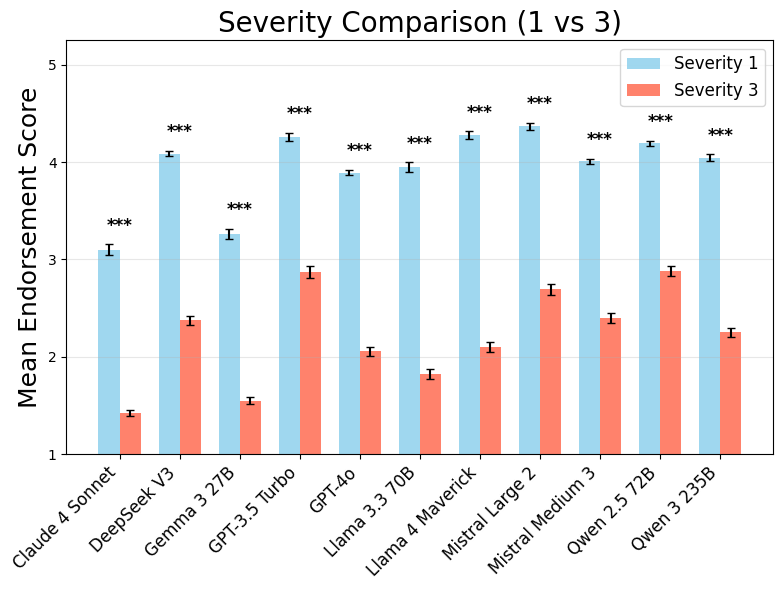

In [68]:
# Severity Comparison (1 vs 3)
def plot_severity_comparison_with_distributional_significance(paragraph_results, test_type='mw', test_distributions=True, save_plots=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Get data for severity 1 and severity 3
    sev1_data = paragraph_df[paragraph_df['severity'] == 1]
    sev3_data = paragraph_df[paragraph_df['severity'] == 3]

    sev1_means = get_mean_scores_with_raw_data(sev1_data, 'classification_score')
    sev3_means = get_mean_scores_with_raw_data(sev3_data, 'classification_score')

    # Merge data
    comparison = sev1_means.merge(sev3_means, on='model', suffixes=('_sev1', '_sev3'))

    # comparison = comparison.sort_values(by='model')

    # Sort by model_name_map keys
    model_order = list(model_name_map.values())
    comparison = comparison.sort_values(by='model', key=lambda x: x.map(dict(zip(model_order, range(len(model_order))))))

    x = np.arange(len(comparison))
    width = 0.35

    bars1 = ax.bar(x - width/2, comparison['mean_sev1'], width,
                    label='Severity 1', alpha=0.8, color='skyblue')
    bars2 = ax.bar(x + width/2, comparison['mean_sev3'], width,
                    label='Severity 3', alpha=0.8, color='tomato')

    # Add error bars
    ax.errorbar(x - width/2, comparison['mean_sev1'],
                yerr=[comparison['mean_sev1'] - comparison['ci_lower_sev1'],
                        comparison['ci_upper_sev1'] - comparison['mean_sev1']],
                fmt='none', color='black', capsize=3)
    ax.errorbar(x + width/2, comparison['mean_sev3'],
                yerr=[comparison['mean_sev3'] - comparison['ci_lower_sev3'],
                        comparison['ci_upper_sev3'] - comparison['mean_sev3']],
                fmt='none', color='black', capsize=3)

    # Perform tests and add significance annotations
    for i, (_, row) in enumerate(comparison.iterrows()):
        if test_distributions:
            p_value = get_distributional_significance(row['raw_data_sev1'],
                                                        row['raw_data_sev3'],
                                                        test_type=test_type)
        else:
            p_value = get_mean_difference_significance(row['raw_data_sev1'],
                                                        row['raw_data_sev3'])
        stars = get_significance_stars(p_value)
        max_height = max(row['ci_upper_sev1'], row['ci_upper_sev3'])
        ax.text(i, max_height + 0.1, stars, ha='center', va='bottom',
                fontsize=12, fontweight='bold')

    ax.set_ylabel('Mean Endorsement Score', fontsize=18)
    ax.set_title('Severity Comparison (1 vs 3)', fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(comparison['model'], rotation=45, ha='right', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_ylim(1, 5.25)
    ax.set_yticks(range(1, 6))

    plt.tight_layout()
    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig("data/figures/ER_severity_comparison_open.pdf", format='pdf', bbox_inches='tight')
        # print("Saved severity comparison plot to data/figures/ER_severity_comparison_open.pdf")
    plt.show()

    return comparison

print("\n4. Severity Comparison (Severity 1 vs 3) with distributional significance:")
severity_comp = plot_severity_comparison_with_distributional_significance(paragraph_results, test_distributions=True, test_type='mw', save_plots=True)

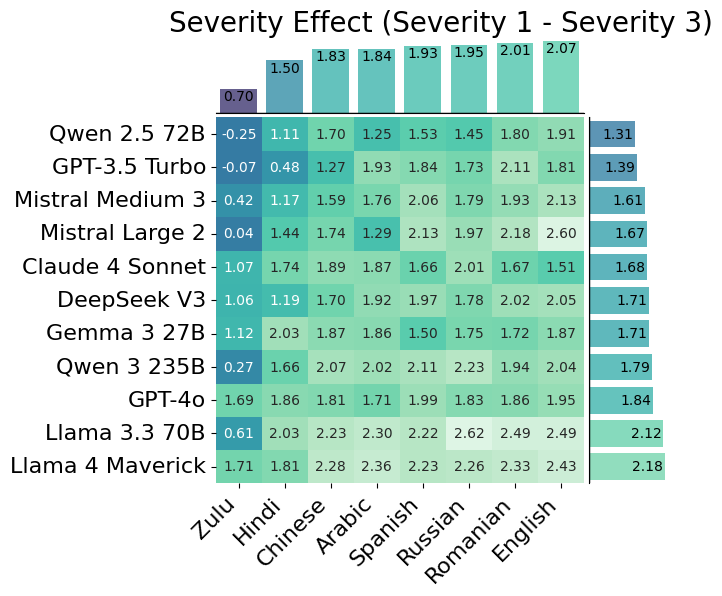

In [ ]:
def calculate_severity_delta_scores(df, group_by=['model', 'lang_code'], data_type='auto'):
    """
    Calculate delta between severity 1 and severity 3 mean endorsement scores.
    Positive values indicate higher endorsement for severity 1 scenarios.

    Args:
        df: DataFrame (either paragraph_results or likert_results)
        group_by: list of columns to group by
        data_type: 'paragraph', 'likert', or 'auto' to detect automatically
    """

    # Auto-detect data type if not specified
    if data_type == 'auto':
        if 'classification' in df.columns:
            data_type = 'paragraph'
        elif 'softmax_probs' in df.columns:
            data_type = 'likert'
        else:
            raise ValueError("Cannot auto-detect data type. Please specify 'paragraph' or 'likert'")

    def get_paragraph_distribution(paragraph_df):
        # Convert classifications to distribution (same as alignment function)
        mapping = {
            'strongly_reject': 1, 'conditionally_reject': 2, 'neutral': 3,
            'conditionally_endorse': 4, 'strongly_endorse': 5
        }
        onehots = np.zeros((len(paragraph_df), 5))
        for idx, cls in enumerate(paragraph_df['classification']):
            i = mapping.get(cls)
            if i is not None:
                onehots[idx, i-1] = 1
        return onehots.mean(axis=0)

    def get_likert_distribution(likert_df):
        # Get average softmax probabilities across all responses (same as alignment function)
        import json
        probs = np.stack([
            np.array([d.get(str(i), 0.) for i in range(1, 6)])
            for d in likert_df['softmax_probs'].map(json.loads)
        ])
        return probs.mean(axis=0)

    def calculate_mean_from_distribution(dist):
        """Calculate mean endorsement score from distribution"""
        return np.sum(dist * np.arange(1, 6))

    # Calculate at granular level first (model, lang_code, limited_article, severity)
    individual_results = []
    granular_group_by = ['model', 'lang_code', 'limited_article', 'severity']

    for group_name, group_data in df.groupby(granular_group_by):
        # Get distribution for this group based on data type
        if data_type == 'paragraph':
            dist = get_paragraph_distribution(group_data)
        elif data_type == 'likert':
            dist = get_likert_distribution(group_data)
        else:
            raise ValueError("data_type must be 'paragraph' or 'likert'")

        # Calculate mean endorsement from distribution
        mean_endorsement = calculate_mean_from_distribution(dist)

        # Create result row
        result = {
            'model': group_name[0],
            'lang_code': group_name[1],
            'limited_article': group_name[2],
            'severity': group_name[3],
            'mean_endorsement': mean_endorsement,
            'n_responses': len(group_data)
        }
        individual_results.append(result)

    individual_df = pd.DataFrame(individual_results)

    # Filter for only severity 1 and 3
    individual_df = individual_df[individual_df['severity'].isin([1, 3])]

    # Calculate delta (severity 1 - severity 3) for each model, lang_code, limited_article
    delta_results = []

    for group_name, group_data in individual_df.groupby(['model', 'lang_code', 'limited_article']):
        severity_data = group_data.set_index('severity')['mean_endorsement']

        # Only calculate delta if we have both severities
        if 1 in severity_data.index and 3 in severity_data.index:
            delta = severity_data[1] - severity_data[3]

            result = {
                'model': group_name[0],
                'lang_code': group_name[1],
                'limited_article': group_name[2],
                'severity_delta': delta,
                'severity_1_score': severity_data[1],
                'severity_3_score': severity_data[3],
                'n_severity_1': group_data[group_data['severity'] == 1]['n_responses'].sum(),
                'n_severity_3': group_data[group_data['severity'] == 3]['n_responses'].sum()
            }
            delta_results.append(result)

    delta_df = pd.DataFrame(delta_results)

    if not group_by:
        # Overall aggregation
        overall_delta = delta_df['severity_delta'].mean()
        return pd.DataFrame([{'severity_delta': overall_delta}])
    else:
        # Aggregate according to specified group_by
        aggregated_results = []

        for group_name, group_data in delta_df.groupby(group_by):
            result = {}

            if isinstance(group_name, tuple):
                for i, col in enumerate(group_by):
                    result[col] = group_name[i]
            else:
                result[group_by[0]] = group_name

            # Average the delta scores across articles
            result['severity_delta'] = group_data['severity_delta'].mean()
            result['n_articles'] = len(group_data)
            result['total_responses_sev1'] = group_data['n_severity_1'].sum()
            result['total_responses_sev3'] = group_data['n_severity_3'].sum()

            aggregated_results.append(result)

        return pd.DataFrame(aggregated_results)

def plot_severity_delta_heatmap(delta_df, figsize=(8, 8), save_plots=None, sort_by='default'):
    """
    Plot severity delta heatmap with marginals.
    Positive values (red) indicate higher endorsement for severity 1 scenarios.
    Negative values (blue) indicate higher endorsement for severity 3 scenarios.
    """
    pivot_data = delta_df.pivot(index='model', columns='lang_code', values='severity_delta')

    # Map language codes to display names
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi'}
    pivot_data.columns = [lang_map.get(col, col) for col in pivot_data.columns]

    # Sort models by model_name_map order
    model_order = list(model_name_map.values())
    pivot_data = pivot_data.reindex([m for m in model_order if m in pivot_data.index])

    # Create figure with manual subplot layout for better control
    fig = plt.figure(figsize=figsize)

    # Define grid layout: main heatmap + marginals
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 4], width_ratios=[4, 1],
                         hspace=0.02, wspace=0.02)

    # Create axes
    ax_main = fig.add_subplot(gs[1, 0])    # Main heatmap
    ax_top = fig.add_subplot(gs[0, 0])     # Top marginal
    ax_right = fig.add_subplot(gs[1, 1])   # Right marginal

    # Create colormap and normalization for delta scores
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    cmap = plt.get_cmap('mako')  # Red for positive (higher sev 1), Blue for negative (higher sev 3)

    # Set symmetric limits around 0
    abs_max = max(abs(pivot_data.min().min()), abs(pivot_data.max().max()))
    vmin, vmax = 0, abs_max
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    if sort_by == 'order':
        # Sort models by their average delta score (ascending order - min to max)
        model_means = pivot_data.mean(axis=1).sort_values()
        pivot_data = pivot_data.reindex(model_means.index)

        # Sort languages by their average delta score (ascending order - min to max)
        lang_means = pivot_data.mean(axis=0).sort_values()
        pivot_data = pivot_data.reindex(columns=lang_means.index)

    # Main heatmap
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap=cmap,
                center=0.0, vmin=vmin, vmax=vmax,
                ax=ax_main, cbar=False)

    # Calculate marginal means
    lang_means = pivot_data.mean(axis=0)
    model_means = pivot_data.mean(axis=1)

    # Top marginal (languages) - align with heatmap columns
    lang_colors = [cmap(norm(val)) for val in lang_means.values]
    x_positions = np.arange(len(lang_means)) + 0.5  # Center on heatmap cells
    bars_top = ax_top.bar(x_positions, lang_means.values, width=0.8,
                         color=lang_colors, alpha=0.8)

    # Add value labels on top marginal bars
    for i, (bar, value) in enumerate(zip(bars_top, lang_means.values)):
        y_pos = bar.get_height() + 0.02 if value <= 0.1 else bar.get_height() - 0.02
        va = 'bottom' if value <= 0.1 else 'top'
        ax_top.text(bar.get_x() + bar.get_width()/2., y_pos,
                   f'{value:.2f}', ha='center', va=va, fontsize=10)

    ax_top.set_xlim(ax_main.get_xlim())
    ax_top.set_ylim(vmin, vmax)
    ax_top.axhline(0, color='black', linewidth=1)
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)

    # Right marginal (models) - align with heatmap rows
    model_colors = [cmap(norm(val)) for val in model_means.values]
    y_positions = np.arange(len(model_means)) + 0.5  # Center on heatmap cells
    bars_right = ax_right.barh(y_positions, model_means.values, height=0.8,
                              color=model_colors, alpha=0.8)

    # Add value labels on right marginal bars
    for i, (bar, value) in enumerate(zip(bars_right, model_means.values)):
        x_pos = bar.get_width() + 0.05 if value <= 0.1 else bar.get_width() - 0.05
        ha = 'left' if value <= 0.1 else 'right'
        ax_right.text(x_pos, bar.get_y() + bar.get_height()/2.,
                     f'{value:.2f}', ha=ha, va='center', fontsize=10, rotation=0)

    ax_right.set_ylim(ax_main.get_ylim())
    ax_right.set_xlim(vmin, vmax)
    ax_right.axvline(0, color='black', linewidth=1)
    ax_right.set_xticks([])
    ax_right.set_yticks([])
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)

    # Style the main heatmap
    ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=16)
    ax_main.set_xlabel('')
    ax_main.set_ylabel('')

    # Add title
    fig.suptitle('Severity Effect (Severity 1 - Severity 3)', fontsize=20, y=0.90)

    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig(save_plots, format='pdf', bbox_inches='tight')
        print(f"Saved severity delta heatmap to {save_plots}")

    plt.show()
    return pivot_data

# Calculate severity delta scores and create the plot
model_lang_severity_delta = calculate_severity_delta_scores(paragraph_results, group_by=['model', 'lang_code'])
severity_delta_heatmap = plot_severity_delta_heatmap(
    model_lang_severity_delta,
    figsize=(6,6),
    # save_plots="data/figures/severity_delta_heatmap.pdf",
    sort_by='order'
)

12672 Likert results loaded
63360 Paragraph results loaded
Saved endorsement heatmap with marginals to data/figures/endorsement_heatmap.pdf


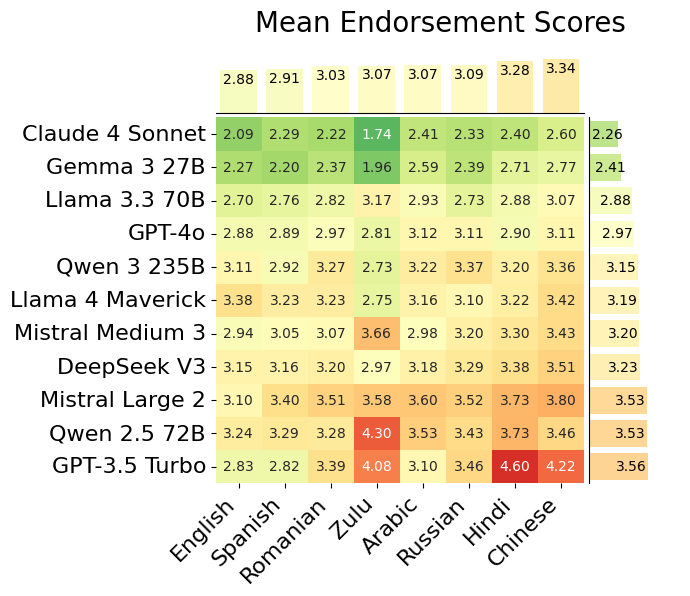

In [149]:
def calculate_mean_endorsement_scores(df, group_by=['model', 'lang_code'], data_type='auto'):
    """
    Calculate mean endorsement scores from either paragraph or likert results using distributions.
    Now uses the same methodology as calculate_alignment_scores for consistency.

    Args:
        df: DataFrame (either paragraph_results or likert_results)
        group_by: list of columns to group by
        data_type: 'paragraph', 'likert', or 'auto' to detect automatically
    """

    # Auto-detect data type if not specified
    if data_type == 'auto':
        if 'classification' in df.columns:
            data_type = 'paragraph'
        elif 'softmax_probs' in df.columns:
            data_type = 'likert'
        else:
            raise ValueError("Cannot auto-detect data type. Please specify 'paragraph' or 'likert'")

    def get_paragraph_distribution(paragraph_df):
        # Convert classifications to distribution (same as alignment function)
        mapping = {
            'strongly_reject': 1, 'conditionally_reject': 2, 'neutral': 3,
            'conditionally_endorse': 4, 'strongly_endorse': 5
        }
        onehots = np.zeros((len(paragraph_df), 5))
        for idx, cls in enumerate(paragraph_df['classification']):
            i = mapping.get(cls)
            if i is not None:
                onehots[idx, i-1] = 1
        return onehots.mean(axis=0)

    def get_likert_distribution(likert_df):
        # Get average softmax probabilities across all responses (same as alignment function)
        import json
        probs = np.stack([
            np.array([d.get(str(i), 0.) for i in range(1, 6)])
            for d in likert_df['softmax_probs'].map(json.loads)
        ])
        return probs.mean(axis=0)

    def calculate_mean_from_distribution(dist):
        """Calculate mean endorsement score from distribution"""
        return np.sum(dist * np.arange(1, 6))

    # Calculate at granular level first (model, lang_code, limited_article)
    individual_results = []
    granular_group_by = ['model', 'lang_code', 'limited_article']

    for group_name, group_data in df.groupby(granular_group_by):
        # Get distribution for this group based on data type
        if data_type == 'paragraph':
            dist = get_paragraph_distribution(group_data)
        elif data_type == 'likert':
            dist = get_likert_distribution(group_data)
        else:
            raise ValueError("data_type must be 'paragraph' or 'likert'")

        # Calculate mean endorsement from distribution
        mean_endorsement = calculate_mean_from_distribution(dist)

        # Create result row
        result = {
            'model': group_name[0],
            'lang_code': group_name[1],
            'limited_article': group_name[2],
            'mean_endorsement': mean_endorsement,
            'n_responses': len(group_data)
        }
        individual_results.append(result)

    individual_df = pd.DataFrame(individual_results)

    if not group_by:
        # Overall aggregation
        overall_mean = individual_df['mean_endorsement'].mean()
        return pd.DataFrame([{'mean_endorsement': overall_mean}])
    else:
        # Aggregate according to specified group_by
        aggregated_results = []

        for group_name, group_data in individual_df.groupby(group_by):
            result = {}

            if isinstance(group_name, tuple):
                for i, col in enumerate(group_by):
                    result[col] = group_name[i]
            else:
                result[group_by[0]] = group_name

            # Average the mean endorsement scores across articles
            result['mean_endorsement'] = group_data['mean_endorsement'].mean()
            result['n_articles'] = len(group_data)
            result['total_responses'] = group_data['n_responses'].sum()

            aggregated_results.append(result)

        return pd.DataFrame(aggregated_results)

def plot_endorsement_heatmap(endorsement_df, figsize=(8, 8), save_plots=None, sort_by='defalut'):
    """
    Plot mean endorsement scores heatmap with marginals, similar to the alignment plot.
    """
    pivot_data = endorsement_df.pivot(index='model', columns='lang_code', values='mean_endorsement')

    # Map language codes to display names
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi'}
    pivot_data.columns = [lang_map.get(col, col) for col in pivot_data.columns]

    # Sort models by model_name_map order
    model_order = list(model_name_map.values())
    pivot_data = pivot_data.reindex([m for m in model_order if m in pivot_data.index])

    # Create figure with manual subplot layout for better control
    fig = plt.figure(figsize=figsize)

    # Define grid layout: main heatmap + marginals (no colorbar space needed)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 4], width_ratios=[4, 1],
                         hspace=0.02, wspace=0.02)

    # Create axes
    ax_main = fig.add_subplot(gs[1, 0])    # Main heatmap
    ax_top = fig.add_subplot(gs[0, 0])     # Top marginal
    ax_right = fig.add_subplot(gs[1, 1])   # Right marginal

    # Create colormap and normalization for endorsement scores (1-5 scale)
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    cmap = plt.get_cmap('RdYlGn_r')  # Red-Yellow-Green reversed (red=low, green=high)
    vmin, vmax = 1, 5
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    if sort_by == 'order':
        # Sort models by their average alignment score (ascending order - min to max)
        model_means = pivot_data.mean(axis=1).sort_values()
        pivot_data = pivot_data.reindex(model_means.index)

        # Sort languages by their average alignment score (ascending order - min to max)
        lang_means = pivot_data.mean(axis=0).sort_values()
        pivot_data = pivot_data.reindex(columns=lang_means.index)

    # Main heatmap
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap=cmap,
                center=3.0, vmin=vmin, vmax=vmax,
                ax=ax_main, cbar=False)

    # Calculate marginal means
    lang_means = pivot_data.mean(axis=0)
    model_means = pivot_data.mean(axis=1)

    # Top marginal (languages) - align with heatmap columns
    lang_colors = [cmap(norm(val)) for val in lang_means.values]
    x_positions = np.arange(len(lang_means)) + 0.5  # Center on heatmap cells
    bars_top = ax_top.bar(x_positions, lang_means.values, width=0.8,
                         color=lang_colors, alpha=0.8)

    # Add value labels on top marginal bars
    for i, (bar, value) in enumerate(zip(bars_top, lang_means.values)):
        ax_top.text(bar.get_x() + bar.get_width()/2., bar.get_height() - 0.1,
                   f'{value:.2f}', ha='center', va='top', fontsize=10)

    ax_top.set_xlim(ax_main.get_xlim())
    ax_top.set_ylim(1, 5)
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)

    # Right marginal (models) - align with heatmap rows
    model_colors = [cmap(norm(val)) for val in model_means.values]
    y_positions = np.arange(len(model_means)) + 0.5  # Center on heatmap cells
    bars_right = ax_right.barh(y_positions, model_means.values, height=0.8,
                              color=model_colors, alpha=0.8)

    # Add value labels on right marginal bars
    for i, (bar, value) in enumerate(zip(bars_right, model_means.values)):
        if value < 2.5:
            ax_right.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2.,
                         f'{value:.2f}', ha='right', va='center', fontsize=10, rotation=0)
        else:
            ax_right.text(bar.get_width() - 0.05, bar.get_y() + bar.get_height()/2.,
                         f'{value:.2f}', ha='right', va='center', fontsize=10, rotation=0)

    ax_right.set_ylim(ax_main.get_ylim())
    ax_right.set_xlim(1, 5)
    ax_right.set_xticks([])
    ax_right.set_yticks([])
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)

    # Style the main heatmap
    ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=16)
    ax_main.set_xlabel('')
    ax_main.set_ylabel('')

    # Add title (using the same style as the MES example)
    fig.suptitle('Mean Endorsement Scores', fontsize=20, y=0.90)

    # Adjust layout (more space since no colorbar)
    # plt.subplots_adjust(left=0.1, right=0.95, top=0.88, bottom=0.15)

    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig(save_plots, format='pdf', bbox_inches='tight')
        print(f"Saved endorsement heatmap with marginals to {save_plots}")

    plt.show()
    return pivot_data

# combine_individual_results_to_all_models(hide_output=True)
likert_results, paragraph_results, model_name_map = get_all_results("standard")

# Calculate mean endorsement scores and create the plot
model_lang_endorsement = calculate_mean_endorsement_scores(paragraph_results, group_by=['model', 'lang_code'])
endorsement_heatmap = plot_endorsement_heatmap(model_lang_endorsement, figsize=(6,6), save_plots="data/figures/endorsement_heatmap.pdf", sort_by='order')

In [ ]:
from scipy.stats import f_oneway
from scipy import stats
import pandas as pd
import numpy as np

def perform_anova_analysis(paragraph_results):
    """
    Perform ANOVA tests to examine significance of differences in mean endorsement scores
    among languages and among models.
    """
    # Prepare the data
    paragraph_df = prepare_paragraph_scores(paragraph_results)

    print("=" * 60)
    print("ANOVA ANALYSIS: MEAN ENDORSEMENT SCORES")
    print("=" * 60)

    # 1. ANOVA for Languages
    print("\n1. ONE-WAY ANOVA: DIFFERENCES AMONG LANGUAGES")
    print("-" * 50)

    # Group data by language
    language_groups = []
    lang_names = []
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi'}

    for lang_code in paragraph_df['lang_code'].unique():
        lang_data = paragraph_df[paragraph_df['lang_code'] == lang_code]['classification_score']
        language_groups.append(lang_data.values)
        lang_names.append(lang_map.get(lang_code, lang_code))

    # Perform ANOVA
    f_stat_lang, p_value_lang = f_oneway(*language_groups)

    print(f"F-statistic: {f_stat_lang:.4f}")
    print(f"p-value: {p_value_lang:.6f}")
    print(f"Degrees of freedom: between = {len(language_groups)-1}, within = {sum(len(g) for g in language_groups) - len(language_groups)}")

    if p_value_lang < 0.001:
        print("Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong evidence of differences among languages")
    elif p_value_lang < 0.01:
        print("Result: VERY SIGNIFICANT (p < 0.01) - Clear evidence of differences among languages")
    elif p_value_lang < 0.05:
        print("Result: SIGNIFICANT (p < 0.05) - Evidence of differences among languages")
    else:
        print("Result: NOT SIGNIFICANT (p >= 0.05) - No strong evidence of differences among languages")

    # Calculate descriptive statistics for languages
    lang_stats = []
    for i, (lang_code, lang_name) in enumerate(zip(paragraph_df['lang_code'].unique(), lang_names)):
        lang_data = paragraph_df[paragraph_df['lang_code'] == lang_code]['classification_score']
        lang_stats.append({
            'Language': lang_name,
            'Mean': lang_data.mean(),
            'Std': lang_data.std(),
            'N': len(lang_data),
            'Min': lang_data.min(),
            'Max': lang_data.max()
        })

    lang_stats_df = pd.DataFrame(lang_stats).sort_values('Mean')
    print("\nDescriptive Statistics by Language (sorted by mean):")
    print(lang_stats_df.round(3).to_string(index=False))

    # 2. ANOVA for Models
    print("\n\n2. ONE-WAY ANOVA: DIFFERENCES AMONG MODELS")
    print("-" * 50)

    # Group data by model
    model_groups = []
    model_names = []

    for model in paragraph_df['model'].unique():
        model_data = paragraph_df[paragraph_df['model'] == model]['classification_score']
        model_groups.append(model_data.values)
        model_names.append(model)

    # Perform ANOVA
    f_stat_model, p_value_model = f_oneway(*model_groups)

    print(f"F-statistic: {f_stat_model:.4f}")
    print(f"p-value: {p_value_model:.6f}")
    print(f"Degrees of freedom: between = {len(model_groups)-1}, within = {sum(len(g) for g in model_groups) - len(model_groups)}")

    if p_value_model < 0.001:
        print("Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong evidence of differences among models")
    elif p_value_model < 0.01:
        print("Result: VERY SIGNIFICANT (p < 0.01) - Clear evidence of differences among models")
    elif p_value_model < 0.05:
        print("Result: SIGNIFICANT (p < 0.05) - Evidence of differences among models")
    else:
        print("Result: NOT SIGNIFICANT (p >= 0.05) - No strong evidence of differences among models")

    # Calculate descriptive statistics for models
    model_stats = []
    for model in paragraph_df['model'].unique():
        model_data = paragraph_df[paragraph_df['model'] == model]['classification_score']
        model_stats.append({
            'Model': model,
            'Mean': model_data.mean(),
            'Std': model_data.std(),
            'N': len(model_data),
            'Min': model_data.min(),
            'Max': model_data.max()
        })

    model_stats_df = pd.DataFrame(model_stats).sort_values('Mean')
    print("\nDescriptive Statistics by Model (sorted by mean):")
    print(model_stats_df.round(3).to_string(index=False))

    # 3. Effect sizes (eta-squared)
    print("\n\n3. EFFECT SIZES (Eta-squared)")
    print("-" * 30)

    # Calculate eta-squared for languages
    total_ss_lang = np.sum([(g - np.concatenate(language_groups).mean())**2 for g in np.concatenate(language_groups)])
    between_ss_lang = np.sum([len(g) * (np.mean(g) - np.concatenate(language_groups).mean())**2 for g in language_groups])
    eta_squared_lang = between_ss_lang / total_ss_lang

    # Calculate eta-squared for models
    total_ss_model = np.sum([(g - np.concatenate(model_groups).mean())**2 for g in np.concatenate(model_groups)])
    between_ss_model = np.sum([len(g) * (np.mean(g) - np.concatenate(model_groups).mean())**2 for g in model_groups])
    eta_squared_model = between_ss_model / total_ss_model

    print(f"Language effect size (η²): {eta_squared_lang:.4f}")
    print(f"Model effect size (η²): {eta_squared_model:.4f}")

    # Interpret effect sizes
    def interpret_eta_squared(eta_sq):
        if eta_sq < 0.01:
            return "negligible"
        elif eta_sq < 0.06:
            return "small"
        elif eta_sq < 0.14:
            return "medium"
        else:
            return "large"

    print(f"Language effect size interpretation: {interpret_eta_squared(eta_squared_lang)}")
    print(f"Model effect size interpretation: {interpret_eta_squared(eta_squared_model)}")

    # 4. Summary
    print("\n\n4. SUMMARY")
    print("-" * 20)
    print(f"• Languages show {'significant' if p_value_lang < 0.05 else 'non-significant'} differences (F={f_stat_lang:.2f}, p={p_value_lang:.6f})")
    print(f"• Models show {'significant' if p_value_model < 0.05 else 'non-significant'} differences (F={f_stat_model:.2f}, p={p_value_model:.6f})")
    print(f"• Language effect accounts for {eta_squared_lang*100:.2f}% of variance")
    print(f"• Model effect accounts for {eta_squared_model*100:.2f}% of variance")

    return {
        'language_anova': {'f_stat': f_stat_lang, 'p_value': p_value_lang, 'eta_squared': eta_squared_lang},
        'model_anova': {'f_stat': f_stat_model, 'p_value': p_value_model, 'eta_squared': eta_squared_model},
        'language_stats': lang_stats_df,
        'model_stats': model_stats_df
    }

# Run the ANOVA analysis
anova_results = perform_anova_analysis(paragraph_results)


ANOVA ANALYSIS: MEAN ENDORSEMENT SCORES

1. ONE-WAY ANOVA: DIFFERENCES AMONG LANGUAGES
--------------------------------------------------
F-statistic: 83.6221
p-value: 0.000000
Degrees of freedom: between = 7, within = 63352
Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong evidence of differences among languages

Descriptive Statistics by Language (sorted by mean):
Language  Mean   Std    N  Min  Max
 English 2.881 1.643 7920    1    5
 Spanish 2.911 1.562 7920    1    5
Romanian 3.029 1.639 7920    1    5
    Zulu 3.068 1.467 7920    1    5
  Arabic 3.075 1.500 7920    1    5
 Russian 3.086 1.598 7920    1    5
   Hindi 3.277 1.397 7920    1    5
 Chinese 3.341 1.590 7920    1    5


2. ONE-WAY ANOVA: DIFFERENCES AMONG MODELS
--------------------------------------------------
F-statistic: 477.4079
p-value: 0.000000
Degrees of freedom: between = 10, within = 63349
Result: HIGHLY SIGNIFICANT (p < 0.001) - Strong evidence of differences among models

Descriptive Statistics by Model (sorte

Saved endorsement heatmap with marginals to data/figures/endorsement_heatmap_likert.pdf


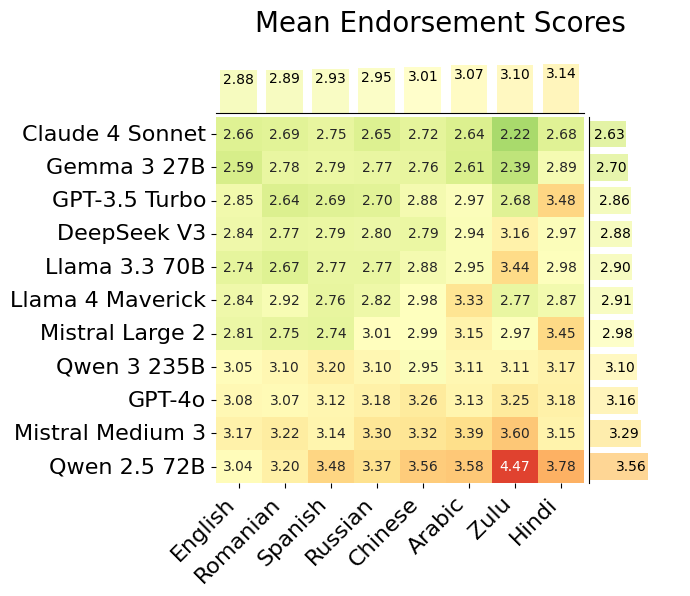

In [150]:

model_lang_endorsement = calculate_mean_endorsement_scores(likert_results, group_by=['model', 'lang_code'])
endorsement_heatmap = plot_endorsement_heatmap(model_lang_endorsement, figsize=(6,6), save_plots="data/figures/endorsement_heatmap_likert.pdf", sort_by='order')

Saved alignment heatmap to data/figures/alignment_heatmap.pdf


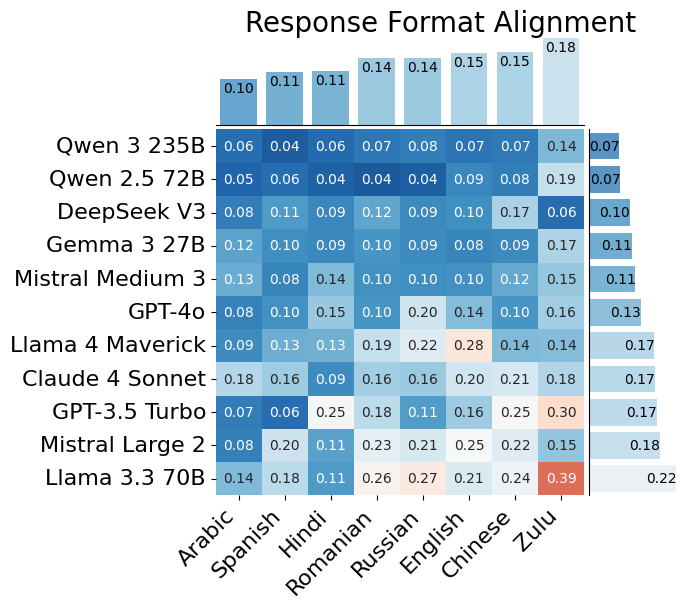

In [171]:
import numpy as np
import pandas as pd
import json
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
import ast
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns


def calculate_alignment_scores(likert_df, paragraph_df, group_by=['model'], alignment_metric='js_divergence'):
    """
    Calculate alignment scores between Likert and Paragraph tasks.
    Higher scores indicate better alignment between the two task formats.

    The alignment score combines multiple metrics:
    1. Inverted Jensen-Shannon divergence (distribution similarity)
    2. Inverted absolute mean difference (mean similarity)
    3. Correlation coefficient between distributions

    Returns a DataFrame with alignment scores and component metrics.
    """

    def get_likert_distribution(likert_df):
        # Get average softmax probabilities across all responses
        probs = np.stack([
            np.array([d.get(str(i), 0.) for i in range(1, 6)])
            for d in likert_df['softmax_probs'].map(json.loads)
        ])
        return probs.mean(axis=0)

    def get_paragraph_distribution(paragraph_df):
        # Convert classifications to distribution
        mapping = {
            'strongly_reject': 1, 'conditionally_reject': 2, 'neutral': 3,
            'conditionally_endorse': 4, 'strongly_endorse': 5
        }
        onehots = np.zeros((len(paragraph_df), 5))
        for idx, cls in enumerate(paragraph_df['classification']):
            i = mapping.get(cls)
            if i is not None:
                onehots[idx, i-1] = 1
        return onehots.mean(axis=0)

    def calculate_alignment_score(likert_dist, paragraph_dist):
        """Calculate composite alignment score"""
        if likert_dist is None or paragraph_dist is None:
            return {}

        # 1. Jensen-Shannon divergence (lower = more similar)
        js_div = jensenshannon(likert_dist, paragraph_dist) ** 2
        js_similarity = 1 - js_div  # Invert so higher = better alignment

        # 2. Mean difference (lower absolute difference = more similar)
        likert_mean = np.sum(likert_dist * np.arange(1, 6))
        paragraph_mean = np.sum(paragraph_dist * np.arange(1, 6))
        mean_diff = paragraph_mean - likert_mean
        mean_similarity = 1 / (1 + abs(mean_diff))  # Transform so higher = better alignment

        # 3. Correlation between distributions
        correlation = np.corrcoef(likert_dist, paragraph_dist)[0, 1]
        if np.isnan(correlation):
            correlation = 0

        # 4. Total variation distance (lower = more similar)
        tv_distance = 0.5 * np.sum(np.abs(likert_dist - paragraph_dist))
        tv_similarity = 1 - tv_distance

        # 5. Wasserstein distance (lower = more similar)
        wasserstein_dist = wasserstein_distance(likert_dist, paragraph_dist)
        # wasserstein_similarity = 1 / (1 + wasserstein_dist)

        # Composite alignment score (weighted average)
        if alignment_metric == 'js_divergence':
            alignment_score = js_div
        elif alignment_metric == 'mean_difference':
            alignment_score = mean_diff
        elif alignment_metric == 'four_metrics':
            alignment_score = 1 - (
                1/4 * js_similarity +
                1/4 * mean_similarity +
                1/4 * correlation +
                1/4 * tv_similarity
            )
        elif alignment_metric == 'wasserstein':
            alignment_score = wasserstein_dist

        return {
            'alignment_score': alignment_score,
            'js_similarity': js_similarity,
            'mean_similarity': mean_similarity,
            'correlation': correlation,
            'tv_similarity': tv_similarity,
            'js_divergence': js_div,
            'mean_difference': mean_diff,
            'likert_mean': likert_mean,
            'paragraph_mean': paragraph_mean
        }

    # First calculate alignment at the most granular level (model, language, article)
    individual_results = []

    # Get all unique combinations at the granular level
    granular_group_by = ['model', 'lang_code', 'limited_article']
    likert_granular = likert_df.groupby(granular_group_by)
    paragraph_granular = paragraph_df.groupby(granular_group_by)

    for group_name, likert_group in likert_granular:
        try:
            paragraph_group = paragraph_granular.get_group(group_name)

            # Get distributions
            likert_dist = get_likert_distribution(likert_group)
            paragraph_dist = get_paragraph_distribution(paragraph_group)

            # Calculate alignment score
            alignment_data = calculate_alignment_score(likert_dist, paragraph_dist)

            # Create result row
            result = {
                'model': group_name[0],
                'lang_code': group_name[1],
                'limited_article': group_name[2]
            }
            result.update(alignment_data)
            result['likert_n'] = len(likert_group)
            result['paragraph_n'] = len(paragraph_group)

            individual_results.append(result)

        except KeyError:
            # Skip if no corresponding group found
            continue

    individual_df = pd.DataFrame(individual_results)

    if not group_by:
        # Overall comparison - aggregate all individual results
        result = {
            'alignment_score': individual_df['alignment_score'].mean(),
            'js_similarity': individual_df['js_similarity'].mean(),
            'mean_similarity': individual_df['mean_similarity'].mean(),
            'correlation': individual_df['correlation'].mean(),
            'tv_similarity': individual_df['tv_similarity'].mean(),
            'js_divergence': individual_df['js_divergence'].mean(),
            'mean_difference': individual_df['mean_difference'].mean(),
            'likert_mean': individual_df['likert_mean'].mean(),
            'paragraph_mean': individual_df['paragraph_mean'].mean(),
            'likert_n': individual_df['likert_n'].sum(),
            'paragraph_n': individual_df['paragraph_n'].sum()
        }
        return pd.DataFrame([result])

    else:
        # Aggregate individual results according to specified group_by
        aggregated_results = []

        for group_name, group_data in individual_df.groupby(group_by):
            # Aggregate alignment metrics by taking the mean across articles
            result = {}

            if isinstance(group_name, tuple):
                for i, col in enumerate(group_by):
                    result[col] = group_name[i]
            else:
                result[group_by[0]] = group_name

            # Aggregate metrics
            result.update({
                'alignment_score': group_data['alignment_score'].mean(),
                'js_similarity': group_data['js_similarity'].mean(),
                'mean_similarity': group_data['mean_similarity'].mean(),
                'correlation': group_data['correlation'].mean(),
                'tv_similarity': group_data['tv_similarity'].mean(),
                'js_divergence': group_data['js_divergence'].mean(),
                'mean_difference': group_data['mean_difference'].mean(),
                'likert_mean': group_data['likert_mean'].mean(),
                'paragraph_mean': group_data['paragraph_mean'].mean(),
                'likert_n': group_data['likert_n'].sum(),
                'paragraph_n': group_data['paragraph_n'].sum(),
                'article_count': len(group_data)  # Number of articles averaged
            })

            aggregated_results.append(result)

        return pd.DataFrame(aggregated_results)


def plot_alignment_comparison(alignment_df, figsize=(8, 8), save_plots=None, vmin=0.0, vmax=0.5, sort_by='default', thresh=0.07):
    pivot_data = alignment_df.pivot(index='model', columns='lang_code', values='alignment_score')

    # Map language codes to display names
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese',
                'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic',
                'kn': 'Kannada', 'zu': 'Zulu', 'hi': 'Hindi',}
    pivot_data.columns = [lang_map.get(col, col) for col in pivot_data.columns]

    # Sort models by overall alignment
    model_order = list(model_name_map.values())
    pivot_data = pivot_data.reindex([m for m in model_order if m in pivot_data.index])

    # Create figure with manual subplot layout for better control
    fig = plt.figure(figsize=figsize)

    # Define grid layout: main heatmap + marginals (no colorbar space needed)
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 4], width_ratios=[4, 1],
                         hspace=0.02, wspace=0.02)

    # Create axes
    ax_main = fig.add_subplot(gs[1, 0])    # Main heatmap
    ax_top = fig.add_subplot(gs[0, 0])     # Top marginal
    ax_right = fig.add_subplot(gs[1, 1])   # Right marginal

    # Create colormap and normalization
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    cmap = plt.get_cmap('RdBu_r')
    # cmap = plt.get_cmap('RdYlGn_r')  # Use a diverging colormap
    # vmin = pivot_data.min().min()
    # vmax = pivot_data.max().max()
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    if sort_by == 'order':
        # Sort models by their average alignment score (ascending order - min to max)
        model_means = pivot_data.mean(axis=1).sort_values()
        pivot_data = pivot_data.reindex(model_means.index)

        # Sort languages by their average alignment score (ascending order - min to max)
        lang_means = pivot_data.mean(axis=0).sort_values()
        pivot_data = pivot_data.reindex(columns=lang_means.index)

    # Main heatmap
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap=cmap,
                center=vmax/2, vmin=vmin, vmax=vmax,
                ax=ax_main, cbar=False)

    # Calculate marginal means
    lang_means = pivot_data.mean(axis=0)
    model_means = pivot_data.mean(axis=1)

    # Top marginal (languages) - align with heatmap columns
    lang_colors = [cmap(norm(val)) for val in abs(lang_means.values)]
    x_positions = np.arange(len(lang_means)) + 0.5  # Center on heatmap cells
    bars_top = ax_top.bar(x_positions, abs(lang_means.values), width=0.8,
                         color=lang_colors, alpha=0.8)

    # Add value labels on top marginal bars
    for i, (bar, value) in enumerate(zip(bars_top, abs(lang_means.values))):
        if value < 0.06:
            va = 'bottom'  # Avoid overlap with x-axis
        else:
            va = 'top'
        ax_top.text(bar.get_x() + bar.get_width()/2., bar.get_height() - 0.005,
                   f'{value:.2f}', ha='center', va=va, fontsize=10)

    ax_top.set_xlim(ax_main.get_xlim())
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)

    # Right marginal (models) - align with heatmap rows
    model_colors = [cmap(norm(val)) for val in abs(model_means.values)]
    y_positions = np.arange(len(model_means)) + 0.5  # Center on heatmap cells
    bars_right = ax_right.barh(y_positions, abs(model_means.values) + 0.01, height=0.8,
                              color=model_colors, alpha=0.8)

    # Add value labels on right marginal bars
    for i, (bar, value) in enumerate(zip(bars_right, abs(model_means.values))):
        if value < thresh:
            ha = 'left'
        else:
            ha = 'right'
        ax_right.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2.,
                     f'{value:.2f}', ha=ha, va='center', fontsize=10, rotation=0)

    ax_right.set_ylim(ax_main.get_ylim())
    ax_right.set_xticks([])
    ax_right.set_yticks([])
    ax_right.spines['top'].set_visible(False)
    ax_right.spines['right'].set_visible(False)
    ax_right.spines['bottom'].set_visible(False)

    # Style the main heatmap
    ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=16)
    ax_main.set_xlabel('')
    ax_main.set_ylabel('')

    # Add title
    fig.suptitle('Response Format Alignment', fontsize=20, y=0.92)

    # Adjust layout (more space since no colorbar)
    # plt.subplots_adjust(left=0.1, right=0.95, top=0.88, bottom=0.15)

    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        fig.savefig(save_plots, format='pdf', bbox_inches='tight')
        print(f"Saved alignment heatmap to {save_plots}")

    plt.show()

# combine_individual_results_to_all_models(hide_output=True)
# likert_results, paragraph_results, model_name_map = get_all_results("standard")

model_lang_alignment = calculate_alignment_scores(likert_results, paragraph_results, group_by=['model', 'lang_code'])
plot_alignment_comparison(model_lang_alignment, figsize=(6,6),save_plots="data/figures/alignment_heatmap.pdf", sort_by='order')

Saved alignment heatmap to data/figures/alignment_heatmap_meandiff.pdf


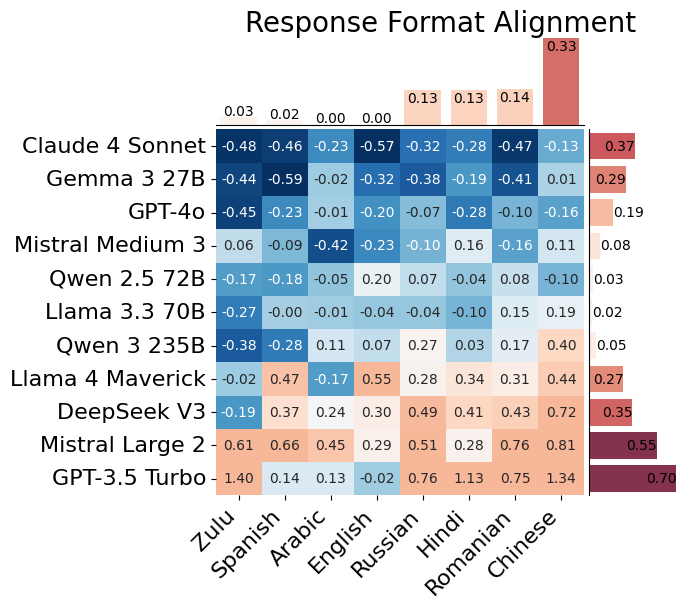

In [172]:
model_lang_alignment = calculate_alignment_scores(likert_results, paragraph_results, group_by=['model', 'lang_code'], alignment_metric='mean_difference')
plot_alignment_comparison(model_lang_alignment, figsize=(6,6), vmin=-0.5, vmax=0.5, sort_by='order', thresh=0.2,save_plots="data/figures/alignment_heatmap_meandiff.pdf")

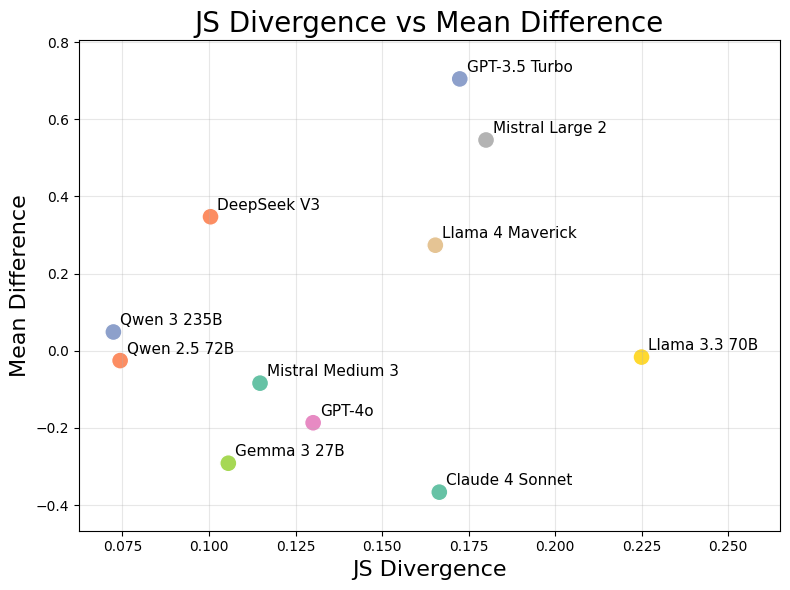

In [871]:
def create_endorsement_js_divergence_scatter(paragraph_results, model_lang_alignment, figsize=(8, 6), save_plots=False, alignment_metric='js_divergence'):
    """
    Create a seaborn scatterplot with JS divergence on the x axis and mean difference on the y axis.
    Plot a single marker for each model, averaged over all languages.
    """
    # Calculate mean JS divergence and mean difference by model (averaged across languages)
    model_averages = []

    for model in model_lang_alignment['model'].unique():
        model_data = model_lang_alignment[model_lang_alignment['model'] == model]

        # Calculate averages across languages for this model
        avg_js_divergence = model_data['js_divergence'].mean()
        avg_mean_difference = model_data['mean_difference'].mean()

        model_averages.append({
            'model': model,
            'avg_js_divergence': avg_js_divergence,
            'avg_mean_difference': avg_mean_difference
        })

    model_avg_df = pd.DataFrame(model_averages)

    # Create the scatterplot with different colors for each point
    plt.figure(figsize=figsize)
    sns.scatterplot(data=model_avg_df, x='avg_js_divergence', y='avg_mean_difference',
                    hue='model', s=150, palette='Set2')

    # Add model labels to each point
    for _, row in model_avg_df.iterrows():
        plt.annotate(row['model'],
                    (row['avg_js_divergence'], row['avg_mean_difference']),
                    xytext=(5, 5), textcoords='offset points', fontsize=11)

    # set axis limits to min and max of the data plus padding
    x_min, x_max = model_avg_df['avg_js_divergence'].min() - 0.01, model_avg_df['avg_js_divergence'].max() + 0.04
    y_min, y_max = model_avg_df['avg_mean_difference'].min() - 0.1, model_avg_df['avg_mean_difference'].max() + 0.1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xlabel('JS Divergence', fontsize=16)
    plt.ylabel('Mean Difference', fontsize=16)
    plt.title('JS Divergence vs Mean Difference', fontsize=20)
    plt.grid(True, alpha=0.3)
    # Remove the legend
    plt.legend().set_visible(False)
    plt.tight_layout()

    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        plt.savefig("data/figures/js_divergence_mean_difference_scatter.pdf", format='pdf', bbox_inches='tight')
        print("Saved JS divergence vs mean difference scatter to data/figures/js_divergence_mean_difference_scatter.pdf")

    plt.show()

    return model_avg_df

# Create the scatter plot
scatter_results = create_endorsement_js_divergence_scatter(
    paragraph_results,
    model_lang_alignment,
    figsize=(8, 6),
    # save_plots=True,
)


Saved endorsement vs JS divergence scatter to data/figures/endorsement_alignment_scatter.pdf


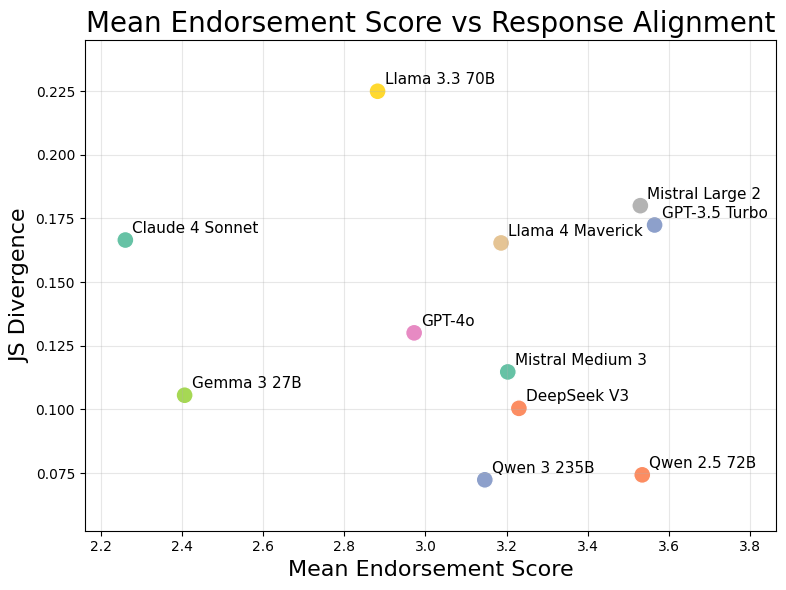

In [794]:
def create_endorsement_js_divergence_scatter(paragraph_results, model_lang_alignment, figsize=(8, 6), save_plots=False, alignment_metric='js_divergence'):
    """
    Create a seaborn scatterplot with mean endorsement score from paragraph responses on the x axis
    and js divergence on the y axis. Plot a single marker for each model, averaged over all languages.
    """
    # Prepare paragraph data - get mean endorsement scores by model and language
    paragraph_df = prepare_paragraph_scores(paragraph_results)
    endorsement_means = paragraph_df.groupby(['model', 'lang_code'])['classification_score'].mean().reset_index()
    endorsement_means = endorsement_means.rename(columns={'classification_score': 'mean_endorsement'})

    # Merge alignment data with endorsement scores
    merged_data = model_lang_alignment.merge(
        endorsement_means,
        on=['model', 'lang_code'],
        how='inner'
    )

    # Calculate mean endorsement scores and JS divergence by model (averaged across languages)
    model_averages = []

    for model in merged_data['model'].unique():
        model_data = merged_data[merged_data['model'] == model]

        # Calculate averages across languages for this model
        avg_endorsement = model_data['mean_endorsement'].mean()
        avg_alignment_metric = model_data[alignment_metric].mean()

        model_averages.append({
            'model': model,
            'avg_endorsement': avg_endorsement,
            'avg_alignment_metric': avg_alignment_metric
        })

    model_avg_df = pd.DataFrame(model_averages)

    # Create the scatterplot with different colors for each point
    plt.figure(figsize=figsize)
    sns.scatterplot(data=model_avg_df, x='avg_endorsement', y='avg_alignment_metric',
                    hue='model', s=150, palette='Set2')

    # Add model labels to each point
    for _, row in model_avg_df.iterrows():
        plt.annotate(row['model'],
                    (row['avg_endorsement'], row['avg_alignment_metric']),
                    xytext=(5, 5), textcoords='offset points', fontsize=11)

    # set axis limits to min and max of the data plus padding
    x_min, x_max = model_avg_df['avg_endorsement'].min() - 0.1, model_avg_df['avg_endorsement'].max() + 0.3
    y_min, y_max = model_avg_df['avg_alignment_metric'].min() - 0.02, model_avg_df['avg_alignment_metric'].max() + 0.02
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    ylabel = 'JS Divergence' if alignment_metric == 'js_divergence' else 'Mean Difference'

    plt.xlabel('Mean Endorsement Score', fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title('Mean Endorsement Score vs Response Alignment', fontsize=20)
    plt.grid(True, alpha=0.3)
    # Remove the legend
    plt.legend().set_visible(False)
    plt.tight_layout()

    if save_plots:
        os.makedirs("data/figures", exist_ok=True)
        plt.savefig("data/figures/endorsement_alignment_scatter.pdf", format='pdf', bbox_inches='tight')
        print("Saved endorsement vs JS divergence scatter to data/figures/endorsement_alignment_scatter.pdf")

    plt.show()

    return model_avg_df

# Create the scatter plot
scatter_results = create_endorsement_js_divergence_scatter(
    paragraph_results,
    model_lang_alignment,
    figsize=(8, 6),
    save_plots=True,
)

3456 Likert results loaded
38880 Paragraph results loaded
Saved single plot to data/figures


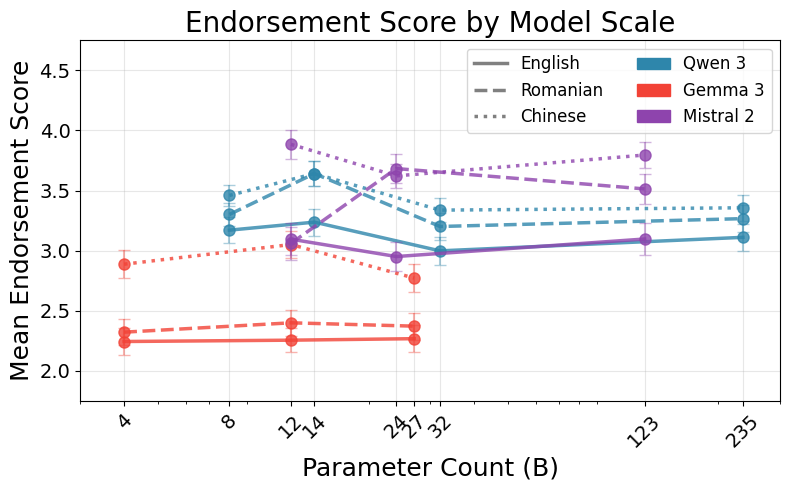

In [677]:
from matplotlib.patches import Patch

import matplotlib.pyplot as plt

def plot_model_scale_language_comparison_single(paragraph_results, figsize=(8, 6), save_plots=False):
    """
    Plot comparison of model performance across languages for different model scales.
    Shows both Qwen 3 and Gemma 3 model families on a single plot.
    """

    # Prepare the data
    paragraph_df = prepare_paragraph_scores(paragraph_results)

    # Filter for the scale models we have
    # scale_models = ['Qwen 3 235B', 'Qwen 3 32B', 'Qwen 3 14B', 'Qwen 3 8B',
    #                 'Gemma 3 27B', 'Gemma 3 12B', 'Gemma 3 4B']
    # df_filtered = paragraph_df[paragraph_df['model'].isin(scale_models)].copy()
    df_filtered = paragraph_df.copy()

    # Get mean scores by model and language
    lang_means = df_filtered.groupby(['model', 'lang_code'])['classification_score'].agg(['mean', 'std', 'count']).reset_index()

    # Calculate confidence intervals
    lang_means['ci'] = 1.96 * lang_means['std'] / np.sqrt(lang_means['count'])

    # Language mapping
    lang_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese'}
    lang_means['language'] = lang_means['lang_code'].map(lang_map)

    # Add model family and size information
    def get_model_info(model_name):
        if 'Qwen 3' in model_name:
            family = 'Qwen 3'
            if '235B' in model_name:
                size = 235  # Scale down 235B for better visualization
                size_label = '235B'
            elif '32B' in model_name:
                size = 32
                size_label = '32B'
            elif '14B' in model_name:
                size = 14
                size_label = '14B'
            elif '8B' in model_name:
                size = 8
                size_label = '8B'
        elif 'Gemma 3' in model_name:
            family = 'Gemma 3'
            if '27B' in model_name:
                size = 27
                size_label = '27B'
            elif '12B' in model_name:
                size = 12
                size_label = '12B'
            elif '4B' in model_name:
                size = 4
                size_label = '4B'
        elif 'Mistral' in model_name:
            family = 'Mistral 2'
            if 'Nemo' in model_name:
                size = 12
                size_label = '12B'
            elif 'Small' in model_name:
                size = 24
                size_label = '24B'
            elif 'Large' in model_name:
                size = 123
                size_label = '123B'
        return family, size, size_label

    lang_means[['family', 'size', 'size_label']] = lang_means['model'].apply(
        lambda x: pd.Series(get_model_info(x))
    )

    # Create the plot
    plt.figure(figsize=figsize)

    # Colors for families
    family_colors = {'Qwen 3': '#2E86AB', 'Gemma 3': '#F24236', 'Mistral 2': '#8E44AD'}

    # Line styles for languages
    lang_styles = {'English': '-', 'Romanian': '--', 'Chinese': ':'}

    # Plot for each family and language combination
    for family in ['Qwen 3', 'Gemma 3', 'Mistral 2']:
        for lang in ['English', 'Romanian', 'Chinese']:
            family_lang_data = lang_means[(lang_means['family'] == family) &
                                         (lang_means['language'] == lang)].copy()

            if len(family_lang_data) > 0:
                # Sort by model size for proper line connection
                family_lang_data = family_lang_data.sort_values('size')

                # Plot the line
                plt.plot(family_lang_data['size'], family_lang_data['mean'],
                       color=family_colors[family], linestyle=lang_styles[lang],
                       marker='o', markersize=8, linewidth=2.5, alpha=0.8,
                       label=f'{family} - {lang}')

                # Add error bars
                plt.errorbar(family_lang_data['size'], family_lang_data['mean'],
                           yerr=family_lang_data['ci'],
                           color=family_colors[family], alpha=0.4, capsize=4,
                           linestyle='none')

    # Customize the plot
    plt.xlabel('Parameter Count (B)', fontsize=18)
    plt.ylabel('Mean Endorsement Score', fontsize=18)
    plt.title('Endorsement Score by Model Scale', fontsize=20)

    # Set x-axis to log scale for better visualization
    plt.xscale('log')
    plt.xlim(3, 300)
    plt.ylim(1.75, 4.75)

    # Custom x-axis labels
    x_ticks = [4, 8, 12, 14, 24, 27, 32, 123, 235]
    # x_labels = ['4B', '8B', '12B', '14B', '24B', '27B', '32B', '123B', '235B']
    plt.xticks(x_ticks, x_ticks, fontsize=14, rotation=45, ha='center')
    plt.yticks(fontsize=14)

    plt.grid(True, alpha=0.3)

    # Create custom legend handles with only line styles
    # Create custom legend with language line styles and model colors
    legend_handles = []

    # Add language line style legends
    for lang in ['English', 'Romanian', 'Chinese']:
        legend_handles.append(plt.Line2D([0], [0], color='gray',
                                       linestyle=lang_styles[lang], linewidth=2.5,
                                       label=f'{lang}'))

    # Add model color legends (using color patches instead of lines)
    for family in ['Qwen 3', 'Gemma 3', 'Mistral 2']:
        legend_handles.append(Patch(color=family_colors[family],
                                  label=f'{family}'))

    plt.legend(handles=legend_handles, ncols=2, fontsize=12)

    plt.tight_layout()

    if save_plots:
        plt.savefig("data/figures/ER_by_scale_language.pdf", format='pdf', bbox_inches='tight')
        print("Saved single plot to data/figures")

    plt.show()

# combine_individual_results_to_all_models(hide_output=True)
likert_results_scale, paragraph_results_scale, model_name_map_scale = get_all_results("scale")

# Generate the single plot
plot_model_scale_language_comparison_single(paragraph_results_scale, figsize=(8,5), save_plots=True)


In [ ]:
import ast

scenarios_df = pd.read_csv("data/scenarios/scenarios_single_right_multilingual.csv")

# List of columns to plot
limited_cols = ['primarily_limited', 'substantially_limited', 'moderately_limited', 'somewhat_limited']
promoted_cols = ['somewhat_promoted', 'moderately_promoted', 'substantially_promoted', 'primarily_promoted']

# Get counts for each right and each level
def get_right_counts_by_level(cols):
    counts_by_level = []
    for col in cols:
        exploded = scenarios_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []).explode()
        exploded = exploded.dropna().apply(lambda x: int(x))
        counts = exploded.value_counts().sort_index()
        counts_by_level.append(counts)
    return counts_by_level

limited_counts_by_level = get_right_counts_by_level(limited_cols)
promoted_counts_by_level = get_right_counts_by_level(promoted_cols[::-1])  # reverse for darkest to lightest

all_rights = sorted(set().union(*[c.index for c in limited_counts_by_level + promoted_counts_by_level]))
if 3 in all_rights:
    all_rights.remove(3)

Saved heatmap with marginals to data/figures/MES_avg_by_language.pdf


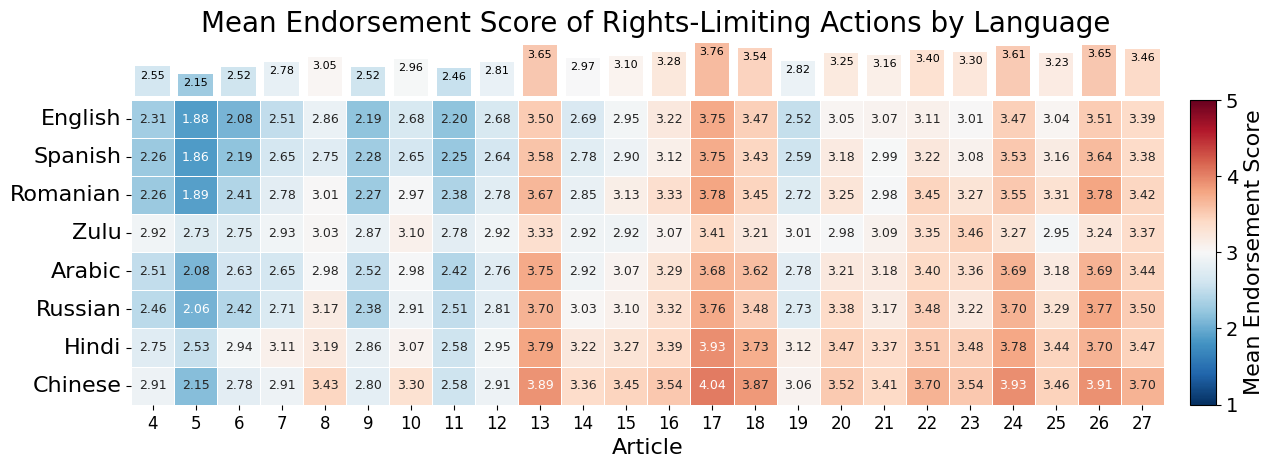

In [734]:
def plot_language_rights_heatmap(
    df,
    filter_query=None,
    plot_type="proportion",
    save_path=None,
    figsize=(16, 3.8),
    show_delta=False,
    limited_category='limited_article',
    sort_by='order',
):
    """
    Plot a heatmap showing proportion of rights-limiting actions that were endorsed by each language.
    Similar to the model heatmap but with languages as rows instead of models.
    Now includes only top marginal plot showing article averages.

    Args:
        df: DataFrame (should be paragraph_results or similar)
        filter_query: str or None, pandas query string to filter df
        plot_type: "count", "proportion", or "mean_score"
        save_path: if provided, save the plot to this path
        show_delta: if True, show delta from English for non-English languages
        sort_by: "default" to keep predefined order, "order" to sort by average mean score
    """
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    # Apply filter to base data if provided
    if filter_query is not None:
        df = df.query(filter_query).copy()

    def extract_rights_list(val):
        if isinstance(val, int):
            return [val] if val in all_rights else []
        if isinstance(val, str):
            try:
                return [int(x) for x in ast.literal_eval(val)]
            except Exception:
                return []
        return []

    if plot_type == "mean_score":
        # Calculate mean pred_score for each language and right combination
        data = df.copy()
        data['primarily_limited_list'] = data[limited_category].apply(extract_rights_list)
        exploded = data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        mean_scores = (
            exploded.groupby(['lang_code', 'primarily_limited_list'])['pred_score']
            .mean()
            .reset_index(name='mean_score')
        )

        heatmap_data = mean_scores.pivot(
            index='lang_code',
            columns='primarily_limited_list',
            values='mean_score'
        ).fillna(0)

    elif plot_type == "proportion":
        # Count endorsed scenarios (pred_score 4 or 5) where each right was primarily limited
        endorsed_data = df[df['pred_score'].isin([4,5])].copy()
        endorsed_data['primarily_limited_list'] = endorsed_data['primarily_limited'].apply(extract_rights_list)
        endorsed_exploded = endorsed_data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        endorsed_counts = (
            endorsed_exploded.groupby(['lang_code', 'primarily_limited_list'])
            .size()
            .reset_index(name='endorsed_count')
        )

        # Count ALL scenarios where each right was primarily limited (regardless of pred_score)
        all_data = df.copy()
        all_data['primarily_limited_list'] = all_data['primarily_limited'].apply(extract_rights_list)
        all_exploded = all_data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        total_counts = (
            all_exploded.groupby(['lang_code', 'primarily_limited_list'])
            .size()
            .reset_index(name='total_count')
        )

        # Merge and calculate proportions
        merged = total_counts.merge(
            endorsed_counts,
            on=['lang_code', 'primarily_limited_list'],
            how='left'
        ).fillna(0)

        merged['proportion'] = merged['endorsed_count'] / merged['total_count']

        heatmap_data = merged.pivot(
            index='lang_code',
            columns='primarily_limited_list',
            values='proportion'
        ).fillna(0)

    else:
        # Original count logic for non-proportion plots
        data = df[df['pred_score'].isin([4,5])].copy()
        data['primarily_limited_list'] = data['primarily_limited'].apply(extract_rights_list)
        exploded = data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        rights_counts = (
            exploded.groupby(['lang_code', 'primarily_limited_list'])
            .size()
            .reset_index(name='count')
        )

        heatmap_data = rights_counts.pivot(index='lang_code', columns='primarily_limited_list', values='count').fillna(0)

    # Ensure all articles are included as columns
    for article in all_rights:
        if article not in heatmap_data.columns:
            heatmap_data[article] = 0

    heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

    # Sort by language code and map to display names
    lang_display_map = {'en': 'English', 'ro': 'Romanian', 'zh-cn': 'Chinese', 'es': 'Spanish', 'ru': 'Russian', 'ar': 'Arabic', 'zu': 'Zulu', 'hi': 'Hindi'}
    heatmap_data.index = heatmap_data.index.map(lang_display_map)
    heatmap_data = heatmap_data.reindex(['Arabic', 'English', 'Hindi', 'Spanish', 'Romanian', 'Russian', 'Chinese', 'Zulu'])

    # Sort languages based on sort_by parameter
    if sort_by == 'order':
        # Calculate average mean score for each language and sort from lowest to highest
        lang_avg_scores = heatmap_data.mean(axis=1).sort_values()
        heatmap_data = heatmap_data.reindex(lang_avg_scores.index)

    if 3 in heatmap_data.columns:
        heatmap_data = heatmap_data.drop(columns=[3])

    # Create annotation data and delta data for coloring
    if show_delta:
        english_values = heatmap_data.loc['English']
        annotations = np.zeros_like(heatmap_data.values, dtype=object)
        # Create delta DataFrame with same index/columns as heatmap_data
        delta_data = heatmap_data.copy()

        for i, lang in enumerate(heatmap_data.index):
            for j, col in enumerate(heatmap_data.columns):
                value = heatmap_data.iloc[i, j]
                if lang == 'English':
                    annotations[i, j] = f'{value:.2f}' if plot_type in ["proportion", "mean_score"] else f'{value:g}'
                    delta_data.iloc[i, j] = 0  # English baseline is 0
                else:
                    delta = value - english_values[col]
                    sign = '+' if delta >= 0 else ''
                    annotations[i, j] = f'{sign}{delta:.2f}' if plot_type in ["proportion", "mean_score"] else f'{sign}{delta:g}'
                    delta_data.iloc[i, j] = delta

        # Use delta DataFrame for coloring with red colormap
        plot_data = delta_data
        cmap = 'RdBu_r'  # Red-Blue colormap, reversed so red is positive
        vmax = 2.0 if plot_type == "mean_score" else 0.5
        vmin = -vmax  # Symmetric around 0
    else:
        annotations = True
        plot_data = heatmap_data
        cmap = 'RdBu_r'
        if plot_type == "mean_score":
            vmin = 1
            vmax = 5
        elif plot_type == "proportion":
            vmin = 0
            vmax = 1
        else:
            vmax = heatmap_data.values.max()

    # Create figure with adjusted layout to account for colorbar
    fig = plt.figure(figsize=figsize)

    # Define grid layout: main heatmap + top marginal only
    # Use width_ratios to account for colorbar space
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 4], width_ratios=[40, 1], hspace=0.02, wspace=0.05)

    # Create axes
    ax_main = fig.add_subplot(gs[1, 0])    # Main heatmap
    ax_top = fig.add_subplot(gs[0, 0])     # Top marginal (articles) - same width as heatmap
    ax_cbar = fig.add_subplot(gs[1, 1])    # Colorbar space

    # Create colormap and normalization
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Main heatmap without colorbar (we'll add it manually)
    sns.heatmap(
        plot_data,
        annot=annotations,
        fmt='' if show_delta else ('.2f' if plot_type in ["proportion", "mean_score"] else 'g'),
        cmap=cmap,
        annot_kws={"size": 9},
        linewidths=0.5,
        vmin=vmin,
        vmax=vmax,
        center=0 if show_delta else None,
        ax=ax_main,
        cbar=False  # Don't create automatic colorbar
    )

    # Create manual colorbar
    import matplotlib.colorbar as colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=ax_cbar)
    cbar_label = 'Δ from English' if show_delta else ('Mean Endorsement Score' if plot_type == "mean_score" else ('Proportion' if plot_type == "proportion" else 'Count'))
    cbar.set_label(cbar_label, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    if plot_type == "mean_score" and not show_delta:
        cbar.set_ticks([1, 2, 3, 4, 5])
    elif plot_type == "count" and not show_delta:
        cbar.set_clim(0, 100)

    # Calculate marginal means
    article_means = heatmap_data.mean(axis=0)  # Mean across languages for each article

    # Top marginal (articles) - align with heatmap columns
    article_colors = [plt.get_cmap(cmap)(norm(val)) for val in article_means.values]
    x_positions = np.arange(len(article_means)) + 0.5  # Center on heatmap cells
    bars_top = ax_top.bar(x_positions, article_means.values, width=0.8,
                         color=article_colors, alpha=0.8)

    # Add value labels on top marginal bars
    for i, (bar, value) in enumerate(zip(bars_top, article_means.values)):
        ax_top.text(bar.get_x() + bar.get_width()/2., bar.get_height() - 0.05 * (vmax - vmin),
                   f'{value:.2f}' if plot_type in ["proportion", "mean_score"] else f'{value:g}',
                   ha='center', va='top', fontsize=8)

    ax_top.set_xlim(ax_main.get_xlim())
    ax_top.set_ylim(vmin, vmax)
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)
    ax_top.spines['bottom'].set_visible(False)

    # Style the main heatmap
    ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=0, fontsize=12)
    ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=16)
    ax_main.set_xlabel('Article', fontsize=16)
    ax_main.set_ylabel('', fontsize=16)

    # Set title
    if plot_type == "mean_score":
        title = 'Mean Endorsement Score of Rights-Limiting Actions by Language'
    elif plot_type == "proportion":
        title = 'Endorsement Rate of Rights-Limiting Actions by Language'
    else:
        title = 'Count of Rights-Limiting Actions Endorsed by Each Language'

    fig.suptitle(title, fontsize=20, y=0.90)

    if save_path is not None:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f"Saved heatmap with marginals to {save_path}")

    plt.show()
    return heatmap_data


# Generate the language-based heatmap for paragraph results
lang_heatmap = plot_language_rights_heatmap(
    paragraph_results,
    plot_type="mean_score",
    # show_delta=True,
    figsize=(14, 5),
    save_path="data/figures/MES_avg_by_language.pdf",
    # limited_category='primarily_limited',
    sort_by='order',
)

Saved heatmap with marginals to data/figures/MES_avg_by_model.pdf


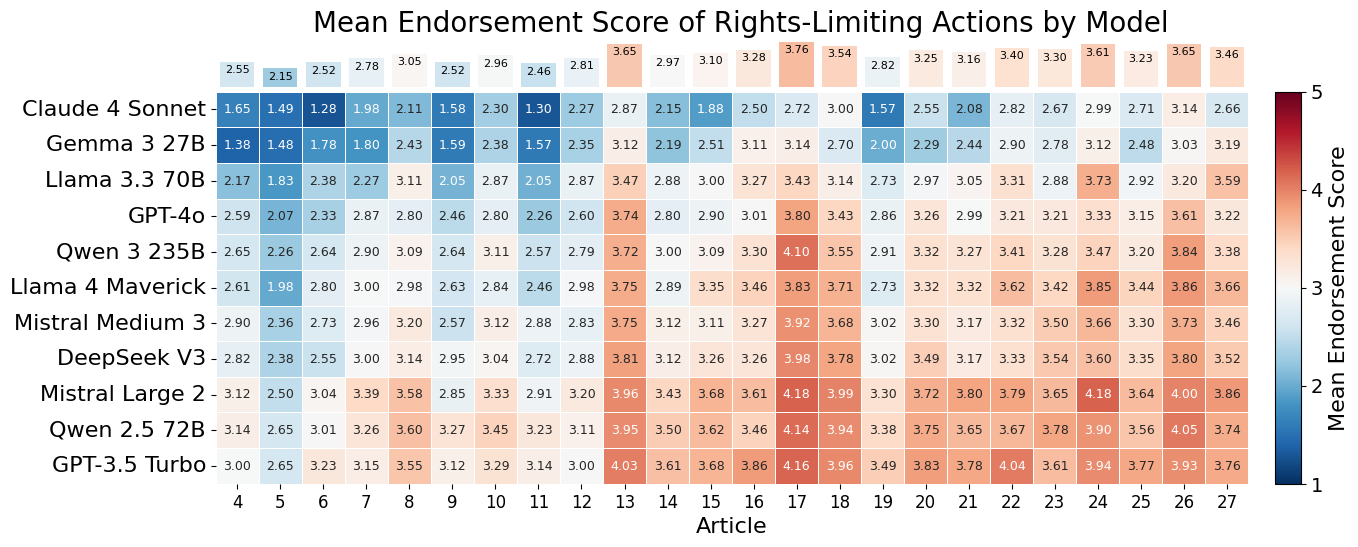

In [733]:
def plot_model_rights_heatmap(
    df,
    filter_query=None,
    plot_type="proportion",
    save_path=None,
    figsize=(16, 3.8),
    show_delta=False,
    baseline_model="GPT-4o",
    limited_category='limited_article',
    sort_by='default',
):
    """
    Plot a heatmap showing proportion of rights-limiting actions that were endorsed by each model.
    Similar to the language heatmap but with models as rows instead of languages.
    Now includes top marginal plot showing article averages.

    Args:
        df: DataFrame (should be paragraph_results or similar)
        filter_query: str or None, pandas query string to filter df
        plot_type: "count", "proportion", or "mean_score"
        save_path: if provided, save the plot to this path
        show_delta: if True, show delta from baseline model for other models
        baseline_model: model to use as baseline when show_delta=True
        sort_by: "default" to keep predefined order, "order" to sort by average mean score
    """
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec

    # Apply filter to base data if provided
    if filter_query is not None:
        df = df.query(filter_query).copy()

    def extract_rights_list(val):
        if isinstance(val, int):
            return [val] if val in all_rights else []
        if isinstance(val, str):
            try:
                return [int(x) for x in ast.literal_eval(val)]
            except Exception:
                return []
        return []

    if plot_type == "mean_score":
        # Calculate mean pred_score for each model and right combination
        data = df.copy()
        data['primarily_limited_list'] = data[limited_category].apply(extract_rights_list)
        exploded = data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        mean_scores = (
            exploded.groupby(['model', 'primarily_limited_list'])['pred_score']
            .mean()
            .reset_index(name='mean_score')
        )

        heatmap_data = mean_scores.pivot(
            index='model',
            columns='primarily_limited_list',
            values='mean_score'
        ).fillna(0)

    elif plot_type == "proportion":
        # Count endorsed scenarios (pred_score 4 or 5) where each right was primarily limited
        endorsed_data = df[df['pred_score'].isin([4,5])].copy()
        endorsed_data['primarily_limited_list'] = endorsed_data['primarily_limited'].apply(extract_rights_list)
        endorsed_exploded = endorsed_data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        endorsed_counts = (
            endorsed_exploded.groupby(['model', 'primarily_limited_list'])
            .size()
            .reset_index(name='endorsed_count')
        )

        # Count ALL scenarios where each right was primarily limited (regardless of pred_score)
        all_data = df.copy()
        all_data['primarily_limited_list'] = all_data['primarily_limited'].apply(extract_rights_list)
        all_exploded = all_data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        total_counts = (
            all_exploded.groupby(['model', 'primarily_limited_list'])
            .size()
            .reset_index(name='total_count')
        )

        # Merge and calculate proportions
        merged = total_counts.merge(
            endorsed_counts,
            on=['model', 'primarily_limited_list'],
            how='left'
        ).fillna(0)

        merged['proportion'] = merged['endorsed_count'] / merged['total_count']

        heatmap_data = merged.pivot(
            index='model',
            columns='primarily_limited_list',
            values='proportion'
        ).fillna(0)

    else:
        # Original count logic for non-proportion plots
        data = df[df['pred_score'].isin([4,5])].copy()
        data['primarily_limited_list'] = data['primarily_limited'].apply(extract_rights_list)
        exploded = data.explode('primarily_limited_list').dropna(subset=['primarily_limited_list'])

        rights_counts = (
            exploded.groupby(['model', 'primarily_limited_list'])
            .size()
            .reset_index(name='count')
        )

        heatmap_data = rights_counts.pivot(index='model', columns='primarily_limited_list', values='count').fillna(0)

    # Ensure all articles are included as columns
    for article in all_rights:
        if article not in heatmap_data.columns:
            heatmap_data[article] = 0

    heatmap_data = heatmap_data.reindex(sorted(heatmap_data.columns), axis=1)

    # Sort models based on sort_by parameter
    if sort_by == 'order':
        # Calculate average mean score for each model and sort from lowest to highest
        model_avg_scores = heatmap_data.mean(axis=1).sort_values()
        heatmap_data = heatmap_data.reindex(model_avg_scores.index)

    if 3 in heatmap_data.columns:
        heatmap_data = heatmap_data.drop(columns=[3])

    # Create annotation data and delta data for coloring
    if show_delta:
        if baseline_model not in heatmap_data.index:
            print(f"Warning: Baseline model '{baseline_model}' not found in data. Using first model as baseline.")
            baseline_model = heatmap_data.index[0]

        baseline_values = heatmap_data.loc[baseline_model]
        annotations = np.zeros_like(heatmap_data.values, dtype=object)
        # Create delta DataFrame with same index/columns as heatmap_data
        delta_data = heatmap_data.copy()

        for i, model in enumerate(heatmap_data.index):
            for j, col in enumerate(heatmap_data.columns):
                value = heatmap_data.iloc[i, j]
                if model == baseline_model:
                    annotations[i, j] = f'{value:.2f}' if plot_type in ["proportion", "mean_score"] else f'{value:g}'
                    delta_data.iloc[i, j] = 0  # Baseline is 0
                else:
                    delta = value - baseline_values[col]
                    sign = '+' if delta >= 0 else ''
                    annotations[i, j] = f'{sign}{delta:.2f}' if plot_type in ["proportion", "mean_score"] else f'{sign}{delta:g}'
                    delta_data.iloc[i, j] = delta

        # Use delta DataFrame for coloring with red colormap
        plot_data = delta_data
        cmap = 'RdBu_r'  # Red-Blue colormap, reversed so red is positive
        vmax = 2.0 if plot_type == "mean_score" else 0.5
        vmin = -vmax  # Symmetric around 0
    else:
        annotations = True
        plot_data = heatmap_data
        cmap = 'RdBu_r'
        if plot_type == "mean_score":
            vmin = 1
            vmax = 5
        elif plot_type == "proportion":
            vmin = 0
            vmax = 1
        else:
            vmax = heatmap_data.values.max()

    # Create figure with adjusted layout to account for colorbar
    fig = plt.figure(figsize=figsize)

    # Define grid layout: main heatmap + top marginal only
    # Use width_ratios to account for colorbar space
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 6], width_ratios=[40, 1], hspace=0.02, wspace=0.05)

    # Create axes
    ax_main = fig.add_subplot(gs[1, 0])    # Main heatmap
    ax_top = fig.add_subplot(gs[0, 0])     # Top marginal (articles) - same width as heatmap
    ax_cbar = fig.add_subplot(gs[1, 1])    # Colorbar space

    # Create colormap and normalization
    import matplotlib.cm as cm
    import matplotlib.colors as mcolors
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

    # Main heatmap without colorbar (we'll add it manually)
    sns.heatmap(
        plot_data,
        annot=annotations,
        fmt='' if show_delta else ('.2f' if plot_type in ["proportion", "mean_score"] else 'g'),
        cmap=cmap,
        annot_kws={"size": 9},
        linewidths=0.5,
        vmin=vmin,
        vmax=vmax,
        center=0 if show_delta else None,
        ax=ax_main,
        cbar=False  # Don't create automatic colorbar
    )

    # Create manual colorbar
    import matplotlib.colorbar as colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    cbar = plt.colorbar(sm, cax=ax_cbar)
    cbar_label = f'Δ from {baseline_model}' if show_delta else ('Mean Endorsement Score' if plot_type == "mean_score" else ('Proportion' if plot_type == "proportion" else 'Count'))
    cbar.set_label(cbar_label, fontsize=16)
    cbar.ax.tick_params(labelsize=14)

    if plot_type == "mean_score" and not show_delta:
        cbar.set_ticks([1, 2, 3, 4, 5])
    elif plot_type == "count" and not show_delta:
        cbar.set_clim(0, 100)

    # Calculate marginal means
    article_means = heatmap_data.mean(axis=0)  # Mean across models for each article

    # Top marginal (articles) - align with heatmap columns
    article_colors = [plt.get_cmap(cmap)(norm(val)) for val in article_means.values]
    x_positions = np.arange(len(article_means)) + 0.5  # Center on heatmap cells
    bars_top = ax_top.bar(x_positions, article_means.values, width=0.8,
                         color=article_colors, alpha=0.8)

    # Add value labels on top marginal bars
    for i, (bar, value) in enumerate(zip(bars_top, article_means.values)):
        ax_top.text(bar.get_x() + bar.get_width()/2., bar.get_height() - 0.05 * (vmax - vmin),
                   f'{value:.2f}' if plot_type in ["proportion", "mean_score"] else f'{value:g}',
                   ha='center', va='top', fontsize=8)

    ax_top.set_xlim(ax_main.get_xlim())
    ax_top.set_ylim(vmin, vmax)
    ax_top.set_xticks([])
    ax_top.set_yticks([])
    ax_top.spines['top'].set_visible(False)
    ax_top.spines['right'].set_visible(False)
    ax_top.spines['left'].set_visible(False)
    ax_top.spines['bottom'].set_visible(False)

    # Style the main heatmap
    ax_main.set_xticklabels(ax_main.get_xticklabels(), rotation=0, fontsize=12)
    ax_main.set_yticklabels(ax_main.get_yticklabels(), rotation=0, fontsize=16)
    ax_main.set_xlabel('Article', fontsize=16)
    ax_main.set_ylabel('', fontsize=16)

    # Set title
    if plot_type == "mean_score":
        title = 'Mean Endorsement Score of Rights-Limiting Actions by Model'
    elif plot_type == "proportion":
        title = 'Endorsement Rate of Rights-Limiting Actions by Model'
    else:
        title = 'Count of Rights-Limiting Actions Endorsed by Each Model'

    fig.suptitle(title, fontsize=20, y=0.90)

    if save_path is not None:
        os.makedirs(os.path.dirname(save_path), exist_ok=True)
        plt.savefig(save_path, format='pdf', bbox_inches='tight')
        print(f"Saved heatmap with marginals to {save_path}")

    plt.show()
    return heatmap_data

# Generate the model-based heatmap for paragraph results
model_heatmap = plot_model_rights_heatmap(
    paragraph_results,
    plot_type="mean_score",
    # show_delta=True,
    # baseline_model="GPT-4o",
    figsize=(14, 6),
    save_path="data/figures/MES_avg_by_model.pdf",
    # limited_category='primarily_limited',
    sort_by='order',
)

# Generated Scenarios Dataset Analysis

In [611]:
import pandas as pd

def print_dataset_statistics(df):
    stats = {
        "Total scenarios": len(df),
        "Unique articles": df['limited_article'].nunique(),
        "Unique rights": df['limited_article_name'].nunique(),
        "Unique scenario texts": df['scenario_text'].nunique(),
        "Unique actors": df['actor'].nunique(),
        "Unique affected groups": df['affected_group'].nunique(),
        "Unique languages": df['lang_code'].nunique(),
        # "Unique models": df['model'].nunique(),
        "Severity levels": sorted(df['severity'].unique()),
        "States of emergency": df['state_of_emergency'].unique().tolist(),
    }
    print("=== Scenario Dataset Statistics ===")
    for k, v in stats.items():
        print(f"{k}: {v}")

# Use the main scenario dataframe (valid_classifications or valid_scores or paragraph_results)
mdf = pd.read_csv("data/scenarios/scenarios_single_right_multilingual.csv")
print_dataset_statistics(mdf)

=== Scenario Dataset Statistics ===
Total scenarios: 1440
Unique articles: 24
Unique rights: 24
Unique scenario texts: 144
Unique actors: 1
Unique affected groups: 1
Unique languages: 10
Severity levels: [np.int64(1), np.int64(3)]
States of emergency: ['no', 'natural_disaster', 'civil_unrest']


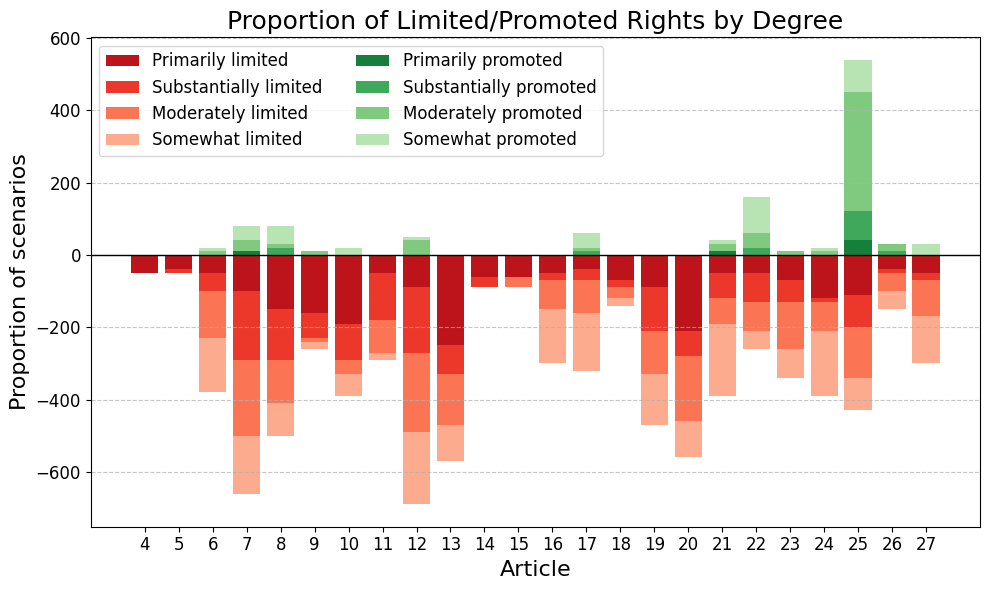

In [503]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

# List of columns to plot
limited_cols = ['primarily_limited', 'substantially_limited', 'moderately_limited', 'somewhat_limited']
promoted_cols = ['somewhat_promoted', 'moderately_promoted', 'substantially_promoted', 'primarily_promoted']

# Get counts for each right and each level
def get_right_counts_by_level(cols):
    counts_by_level = []
    for col in cols:
        exploded = scenarios_df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else []).explode()
        exploded = exploded.dropna().apply(lambda x: int(x))
        counts = exploded.value_counts().sort_index()
        counts_by_level.append(counts)
    return counts_by_level

limited_counts_by_level = get_right_counts_by_level(limited_cols)
promoted_counts_by_level = get_right_counts_by_level(promoted_cols[::-1])  # reverse for darkest to lightest

all_rights = sorted(set().union(*[c.index for c in limited_counts_by_level + promoted_counts_by_level]))
if 3 in all_rights:
    all_rights.remove(3)

normalizer = 1#len(d)

# Prepare DataFrame for plotting (normalize to proportions)
limited_df = pd.DataFrame({col: c / normalizer for col, c in zip(limited_cols, limited_counts_by_level)}).fillna(0).reindex(all_rights, fill_value=0)
promoted_df = pd.DataFrame({col: c / normalizer for col, c in zip(promoted_cols[::-1], promoted_counts_by_level)}).fillna(0).reindex(all_rights, fill_value=0)

# Colors: deepest for primarily, lightest for somewhat
limited_palette = plt.get_cmap('Reds')(np.linspace(0.8, 0.3, 4))
promoted_palette = plt.get_cmap('Greens')(np.linspace(0.8, 0.3, 4))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked bars for limited (negative, left)
bottom = np.zeros(len(all_rights))
for i, col in enumerate(limited_cols):
    vals = -limited_df[col].values
    ax.bar(all_rights, vals, bottom=bottom, color=limited_palette[i], label=col.replace('_', ' ').capitalize(), linewidth=0)
    bottom += vals

# Plot stacked bars for promoted (positive, right)
bottom = np.zeros(len(all_rights))
for i, col in enumerate(promoted_cols[::-1]):
    vals = promoted_df[col].values
    ax.bar(all_rights, vals, bottom=bottom, color=promoted_palette[i], label=col.replace('_', ' ').capitalize(), linewidth=0)
    bottom += vals

ax.axhline(0, color='black', linewidth=1)
ax.set_ylabel('Proportion of scenarios', fontsize=16)
ax.set_xlabel('Article', fontsize=16)
ax.set_title('Proportion of Limited/Promoted Rights by Degree', fontsize=18)
ax.set_xticks(all_rights)
ax.set_xticklabels(all_rights, rotation=0)
ax.legend(loc='upper left', fontsize=12, ncols=2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='x', linestyle='')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("data/figures/rights_distribution_by_degree_proportion.pdf", format='pdf', bbox_inches='tight')
plt.show()

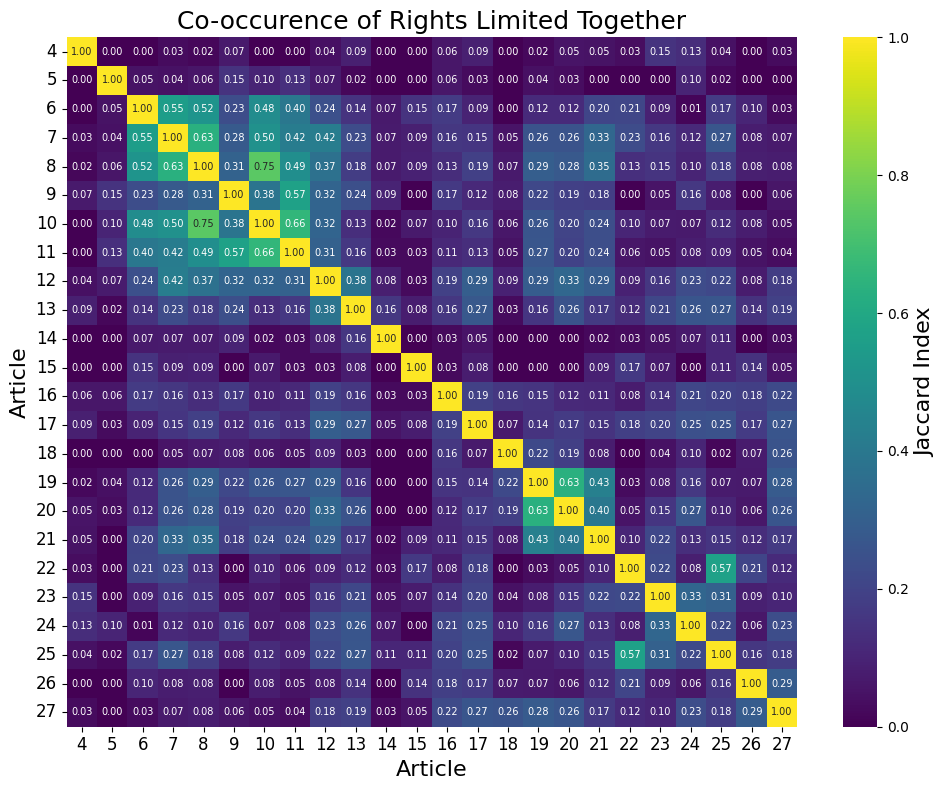

In [504]:
import numpy as np
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt

# Use all_rights as the set of rights to include
rights = all_rights

# List of all limited columns to include
limited_cols = ['primarily_limited', 'substantially_limited', 'moderately_limited', 'somewhat_limited']

# For each scenario, get the set of limited rights
def get_all_limited(row):
    rights_set = set()
    for col in limited_cols:
        items = ast.literal_eval(row[col]) if isinstance(row[col], str) else []
        rights_set.update(int(x) for x in items)
    return rights_set

all_limited_sets = scenarios_df.apply(get_all_limited, axis=1)

# For each right, get the set of scenario indices where it is limited
right_to_scenarios = {right: set() for right in rights}
for idx, limited_set in all_limited_sets.items():
    for right in limited_set:
        if right in right_to_scenarios:
            right_to_scenarios[right].add(idx)

# Compute Jaccard index matrix
jaccard_matrix = pd.DataFrame(0.0, index=rights, columns=rights)
for i in rights:
    for j in rights:
        set_i = right_to_scenarios[i]
        set_j = right_to_scenarios[j]
        intersection = len(set_i & set_j)
        union = len(set_i | set_j)
        if union > 0:
            jaccard_matrix.loc[i, j] = intersection / union
        else:
            jaccard_matrix.loc[i, j] = np.nan

plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    jaccard_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",
    annot_kws={"fontsize": 7}
)
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Jaccard Index', fontsize=16)

plt.title("Co-occurence of Rights Limited Together", fontsize=18)
plt.xlabel("Article", fontsize=16)
plt.ylabel("Article", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.savefig("data/figures/jaccard_index_coocurring_rights.pdf", format='pdf', bbox_inches='tight')
plt.show()


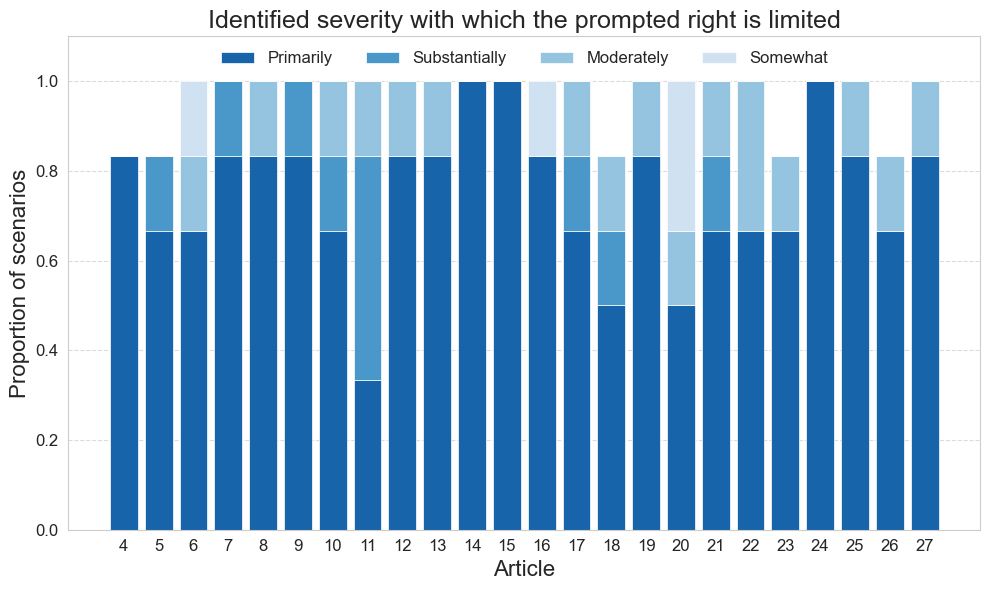

In [505]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import Blues
import seaborn as sns
sns.set_style(style="whitegrid")

severity_order = [
    "primarily_limited",        # bottom – darkest
    "substantially_limited",
    "moderately_limited",
    "somewhat_limited",         # top – lightest
]

# Create Boolean columns for each severity level
for col in severity_order:
    # For each row, check if the limited_article appears in that severity column
    scenarios_df[f"{col}_match"] = scenarios_df.apply(
        lambda row: row['limited_article'] in ast.literal_eval(row[col])
        if isinstance(row[col], str) else False,
        axis=1
    )

# ­dark ➜ light colour ramp that matches the order above
# Use a nicer palette of blues from seaborn
palette = sns.color_palette("Blues_r", n_colors=len(severity_order))

# proportions per severity level, as before
severity_props = {
    col: scenarios_df.groupby("limited_article")[f"{col}_match"]
            .mean().reindex(all_rights).fillna(0)
    for col in severity_order
}

x = np.arange(len(all_rights))
bottom = np.zeros_like(x, dtype=float)

plt.figure(figsize=(10, 6))

for i, sev in enumerate(severity_order):
    vals = severity_props[sev].values
    plt.bar(
        x,
        vals,
        bottom=bottom,
        color=palette[i],
        label=sev.replace("_limited", "").capitalize(),
        edgecolor="white",
        linewidth=0.5,
    )
    bottom += vals            # build the stack upward

# cosmetics
plt.xticks(x, all_rights, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Article", fontsize=16)
plt.ylabel("Proportion of scenarios", fontsize=16)
plt.title("Identified severity with which the prompted right is limited", fontsize=18)
plt.ylim(0, 1.1)
plt.legend(frameon=False, ncol=4, fontsize=12, loc='upper center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='')

plt.tight_layout()
plt.savefig("data/figures/severity_proportions.pdf", format='pdf', bbox_inches='tight')
plt.show()